# AMNA HASSAN

1.Reading Data and cleanup

2.Univariant analysis (1. Salaries in USD 2. Job Count) 

3.Bivariant analysis (1. Country vs Average salary 2. Job titles and Average salary )

4.Multivariant analysis (1. Job Count Vs Median Salary Vs Job Title 2. Top Ten Job titles and Average salary 3. Bottom Ten Job titles and Average salaryRatio 4. No of Job VS Remote Ratio)

5.Saving New dataset and Figs to Output_data_AH


In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import statistics as stat
import re

#read csv file
df = pd.read_csv("./ds_salaries.csv")
df
#Find duplicate rows
duplicate_rows = df[df.duplicated()]
#Remove duplicate rows
df = df.drop_duplicates()
df
# finding if there are any null value
df.isna().sum()

#dropping salary and salary_currency columns
df=df.drop(["salary","salary_currency"], axis=1)
df

#saving data to output_data csv file
df.to_csv("output_data_AH/salaries.csv")

# describing salary in usd
salary_usd_df= df["salary_in_usd"]
salary_usd_df.describe()


count      2584.000000
mean     133409.280186
std       67136.837329
min        5132.000000
25%       84975.000000
50%      130000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

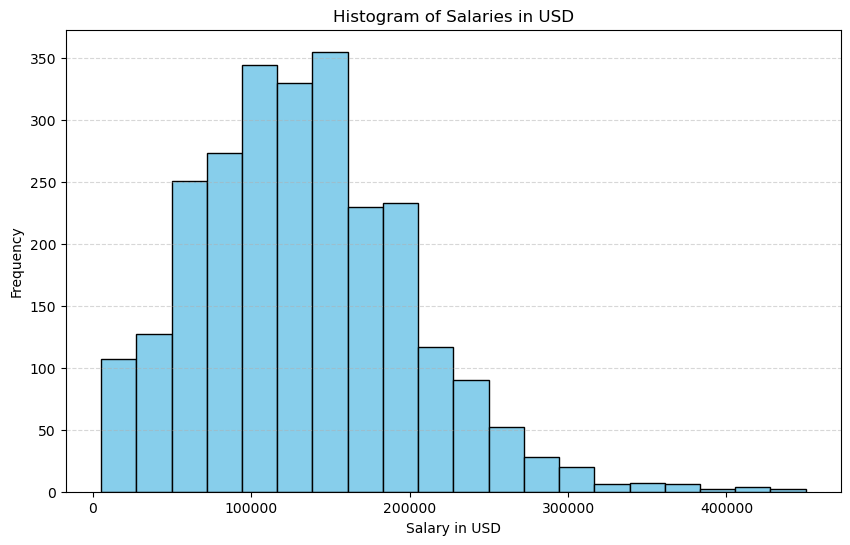

In [2]:
new_df = df[["job_title", "salary_in_usd"]]
new_df

#plotting a histogram for the new df
plt.figure(figsize=(10, 6))
plt.hist(df['salary_in_usd'], bins=20, edgecolor='k', color='skyblue')
plt.xlabel("Salary in USD")
plt.ylabel("Frequency")
plt.title("Histogram of Salaries in USD")
plt.grid(axis='y', linestyle='--', alpha=0.5)

#saving plot in output file
plt.savefig("output_data_AH/Fig1.png")

#show plot
plt.show()

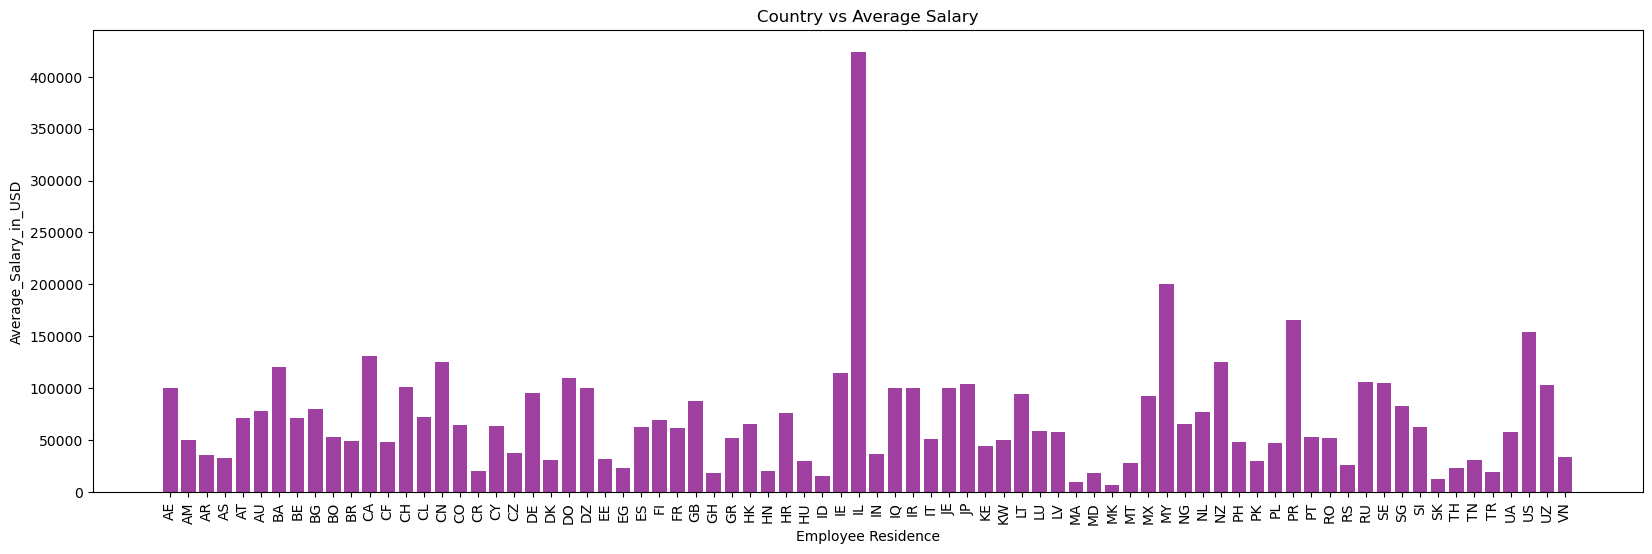

In [4]:
#calculating averge salary in usd
mean_salary_usd = round(new_df["salary_in_usd"].mean(), 2)
mean_salary_usd

data= df[["work_year","employment_type","job_title","salary_in_usd","employee_residence"]]
data_df = pd.DataFrame(data)
data_df
#calculating averge salary by country
average_salary_by_country = df.groupby("employee_residence")["salary_in_usd"].mean().reset_index()

# Rename the column to "Average_Salary_in_USD"
average_salary_by_country = average_salary_by_country.rename(columns={"salary_in_usd": "Average_Salary_in_USD"})

# Round the salary values to two decimal places
average_salary_by_country["Average_Salary_in_USD"] = average_salary_by_country["Average_Salary_in_USD"].round(2)
average_salary_by_country

#plot bar chart Country vs Average Salary
fig = plt.figure(figsize = (20,6))
plt.bar(average_salary_by_country["employee_residence"], average_salary_by_country["Average_Salary_in_USD"],color ='purple',alpha=0.75)
plt.xlabel("Employee Residence")
plt.ylabel("Average_Salary_in_USD")
plt.title("Country vs Average Salary")
plt.xticks(rotation=90)

#saving plot in output file
plt.savefig("output_data_AH/Fig2.png")

#show plot
plt.show()

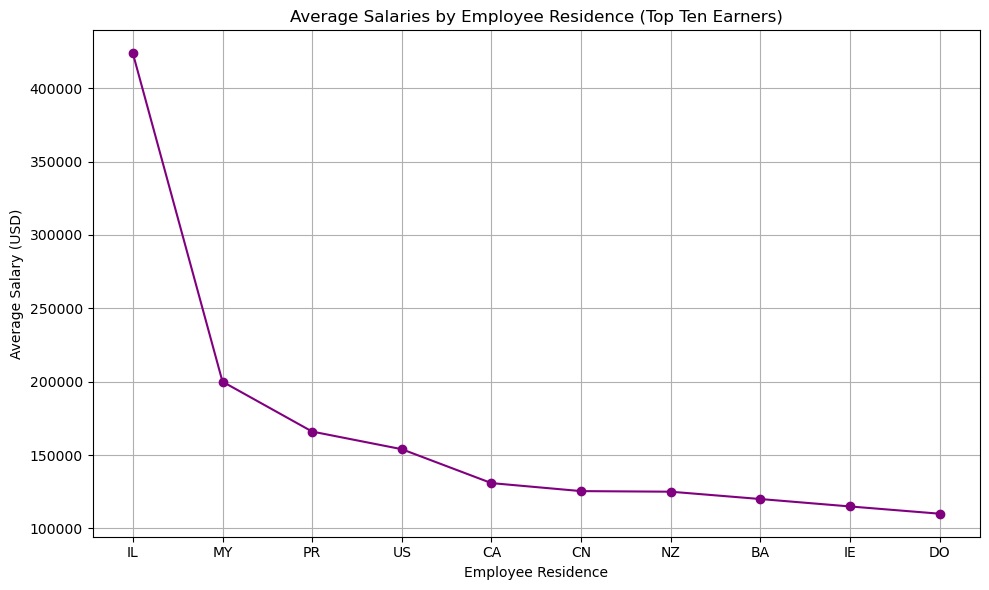

In [5]:
#calculating top ten countries df by average salary
top_ten_countries = average_salary_by_country.nlargest(10, "Average_Salary_in_USD").reset_index(drop=True)
top_ten_countries

#ploting a curve chart for top ten countries by average salary
employee_residence = ["IL", "MY", "PR", "US", "CA", "CN", "NZ", "BA", "IE", "DO"]
average_salary = [423834.00, 200000.00, 166000.00, 153972.21, 130859.84, 125404.00, 125000.00, 120000.00, 114943.43, 110000.00]

# Create a curve chart
plt.figure(figsize=(10, 6))
plt.plot(employee_residence, average_salary, marker='o', linestyle='-',color="purple")
plt.title('Average Salaries by Employee Residence (Top Ten Earners)')
plt.xlabel('Employee Residence')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=0)
plt.grid(True)

plt.savefig("output_data_AH/Fig3b(curve_chart)(.png")

# Show the chart
plt.tight_layout()
plt.show()


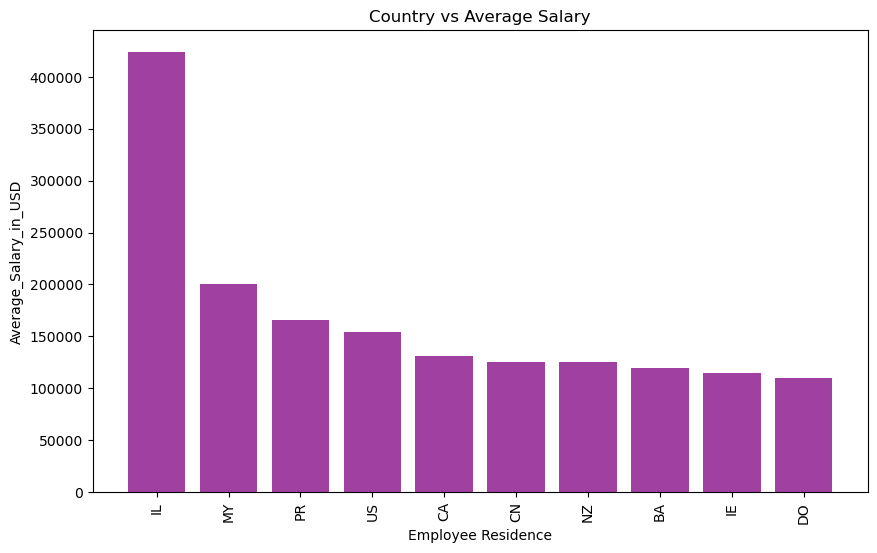

In [6]:
#ploting a bar chart for top ten countries by average salary
fig = plt.figure(figsize = (10,6))
plt.bar(top_ten_countries["employee_residence"], top_ten_countries["Average_Salary_in_USD"],color ='purple',alpha=0.75)
plt.xlabel("Employee Residence")
plt.ylabel("Average_Salary_in_USD")
plt.title("Country vs Average Salary")
plt.xticks(rotation=90)

#saving plot in output file
plt.savefig("output_data_AH/Fig3.png")

#show plot
plt.show()


# Geographical Salary Distribution Analysis:
The dataset showcases variations in average salaries across different countries, indicating differences in economic conditions and labor markets. Some countries, like the United States, offer high average salaries, while others, such as Vietnam, have lower averages. This data reflects the global diversity of data science professionals' residence locations and is valuable for making informed decisions about career opportunities in various countries. It underscores the importance of considering not only job roles but also economic factors when planning a data science career. 

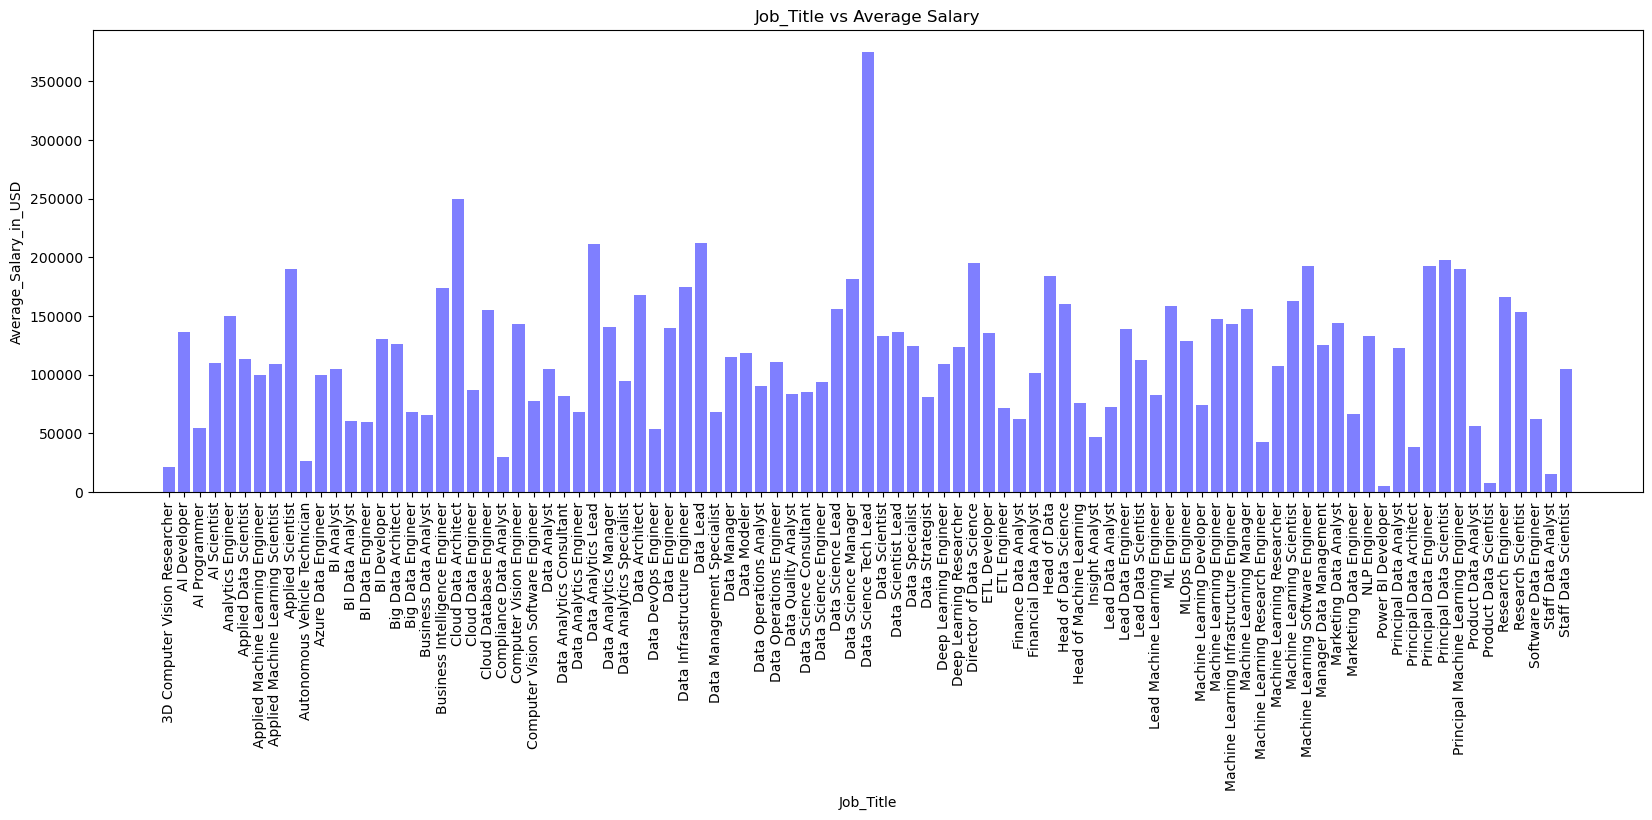

In [7]:
#creating a new df with job titles and average salary 
title_salary_df= df.groupby("job_title")["salary_in_usd"].mean().reset_index()
title_salary_df= title_salary_df.rename(columns={"job_title": "Job_Title"})
title_salary_df= title_salary_df.rename(columns={"salary_in_usd": "Average_Salary_in_USD"})
title_salary_df= round(title_salary_df,2)
title_salary_df

#ploting a bar chart for titles by average salary
fig = plt.figure(figsize = (20,6))
plt.bar(title_salary_df["Job_Title"], title_salary_df["Average_Salary_in_USD"],color ='blue',alpha=0.50)
plt.xlabel("Job_Title")
plt.ylabel("Average_Salary_in_USD")
plt.title("Job_Title vs Average Salary")
plt.xticks(rotation=90)

#saving plot in output file
plt.savefig("output_data_AH/Fig4.png")

#show plot
plt.show()

In [14]:
#creating a new df for job_count
job_count_df = df['job_title'].value_counts().reset_index()
job_count_df= job_count_df.rename(columns={"index": "Job_Title", "job_title": "Job_Count"})
job_count_df

#merging job_count_df to title_salary_df
title_salary_df= title_salary_df.merge(job_count_df, on="Job_Title", how="left")
title_salary_df

#finding top ten salary titles 
top_10_salary_titles = title_salary_df.nlargest(10, "Average_Salary_in_USD").reset_index(drop=True)
top_10_salary_titles

#group by job_title and calculate the median salary

title_median_salary_df = df.groupby("job_title")["salary_in_usd"].median().reset_index()

title_median_salary_df = title_median_salary_df.rename(columns={"job_title": "Job_Title", "salary_in_usd": "Median_Salary_in_USD"})

title_median_salary_df["Median_Salary_in_USD"] = title_median_salary_df["Median_Salary_in_USD"].round(2)
title_median_salary_df

#merge title_median_salary_df and job_count_df 
title_median_salary_df= title_median_salary_df.merge(job_count_df)
title_median_salary_df

# calculating top ten job titles by median salary 
top_10_median_salary_titles = title_median_salary_df.nlargest(10, "Median_Salary_in_USD").reset_index(drop=True)
top_10_median_salary_titles


,Job_Title,Median_Salary_in_USD,Job_Count
0,Data Science Tech Lead,375000.0,1
1,Cloud Data Architect,250000.0,1
2,Data Lead,212500.0,2
3,Data Analytics Lead,211254.5,2
4,Head of Data,202500.0,10
5,Principal Data Engineer,192500.0,2
6,Applied Scientist,192000.0,31
7,Principal Machine Learning Engineer,190000.0,1
8,Data Infrastructure Engineer,183655.0,6
9,Machine Learning Software Engineer,181800.0,10


/var/folders/r5/6w_bfh4n6p717hxdwjctkzmw0000gn/T/ipykernel_73819/567598905.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_10_median_salary_titles["Job_Title"], rotation=90)


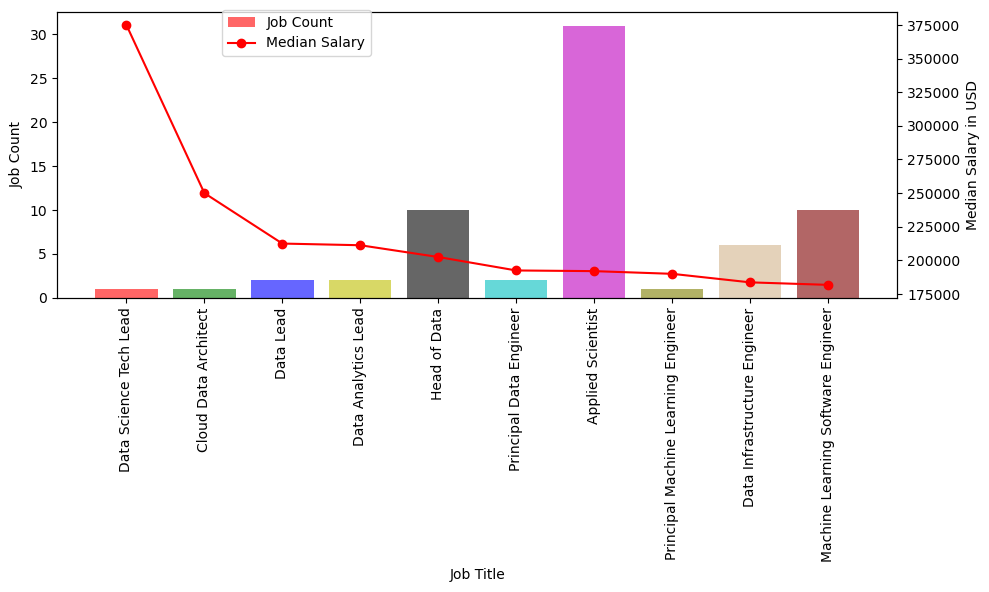

In [15]:

#Create a two Y axis plot
fig, ax1 = plt.subplots(figsize=(10, 6))
colors = ["r", "g", "b", "y", "k", "c", "m", "olive", "tan", "maroon"]

# Bar plot for job count with specified colors
ax1.bar(top_10_median_salary_titles["Job_Title"], top_10_median_salary_titles["Job_Count"], alpha=0.6, color=colors, label="Job Count")
ax1.set_xlabel('Job Title')
ax1.set_ylabel('Job Count')
ax1.tick_params(axis='y')
ax1.set_xticklabels(top_10_median_salary_titles["Job_Title"], rotation=90)



# Create a second y-axis for Average salary
ax2 = ax1.twinx()
ax2.plot(top_10_median_salary_titles['Job_Title'], top_10_median_salary_titles["Median_Salary_in_USD"], color='r', marker='o', label='Median Salary')
ax2.set_ylabel('Median Salary in USD')
ax2.tick_params(axis='y')

# Add legend
fig.legend(loc="upper left", bbox_to_anchor=(0.22, 0.99))


# Show the plot
plt.tight_layout()
plt.savefig("output_data_AH/Fig12.png")
plt.show()


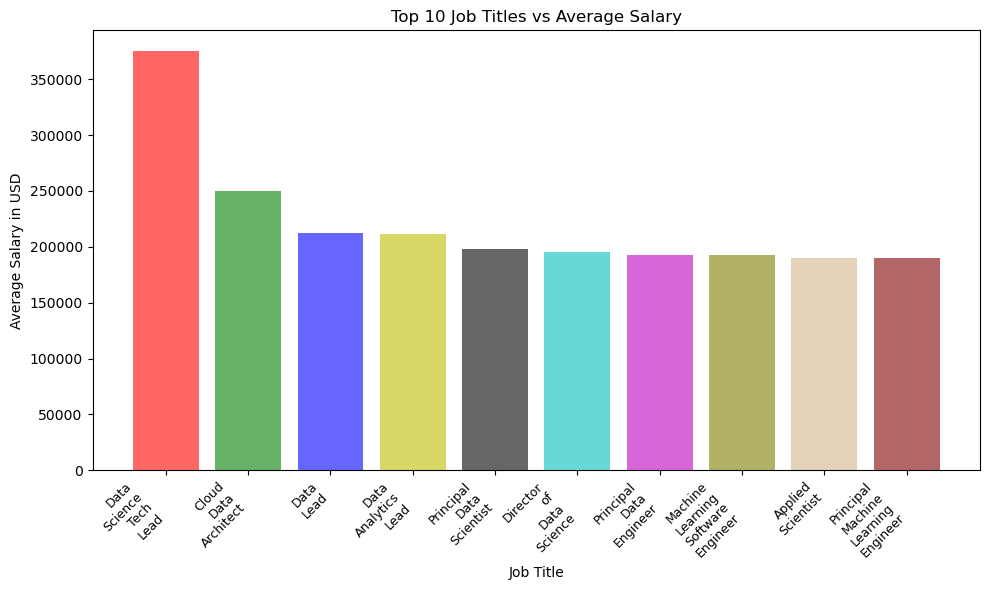

In [16]:
#ploting a bar chart for top ten job titles by average salary
job_titles = [
    "Data Science Tech Lead",
    "Cloud Data Architect",
    "Data Lead",
    "Data Analytics Lead",
    "Principal Data Scientist",
    "Director of Data Science",
    "Principal Data Engineer",
    "Machine Learning Software Engineer",
    "Applied Scientist",
    "Principal Machine Learning Engineer"
]

average_salaries = [375000.00, 250000.00, 212500.00, 211254.50, 198171.12,195140.73,192500.00,192420.00,190342.58,190000.00]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
color= ["r","g","b","y","k","c","m","olive","tan","maroon"]

# Create the bar chart
bars = ax.bar(range(len(job_titles)), average_salaries, color=color, alpha=0.60)

# Manually split x-tick labels into two lines
custom_xtick_labels = []
for title in job_titles:
    lines = title.split()
    if len(lines) > 1:
        custom_xtick_labels.append("\n".join(lines))
    else:
        custom_xtick_labels.append(title)

# Set x-tick positions and labels
ax.set_xticks(range(len(custom_xtick_labels)))
ax.set_xticklabels(custom_xtick_labels, fontsize=9, rotation=45, ha="right")

# Set labels and title
ax.set_xlabel("Job Title")
ax.set_ylabel("Average Salary in USD")
ax.set_title("Top 10 Job Titles vs Average Salary")


#saving plot in output file
plt.savefig("output_data_AH/Fig5.png")


# Show the plot
plt.tight_layout()  
plt.show()




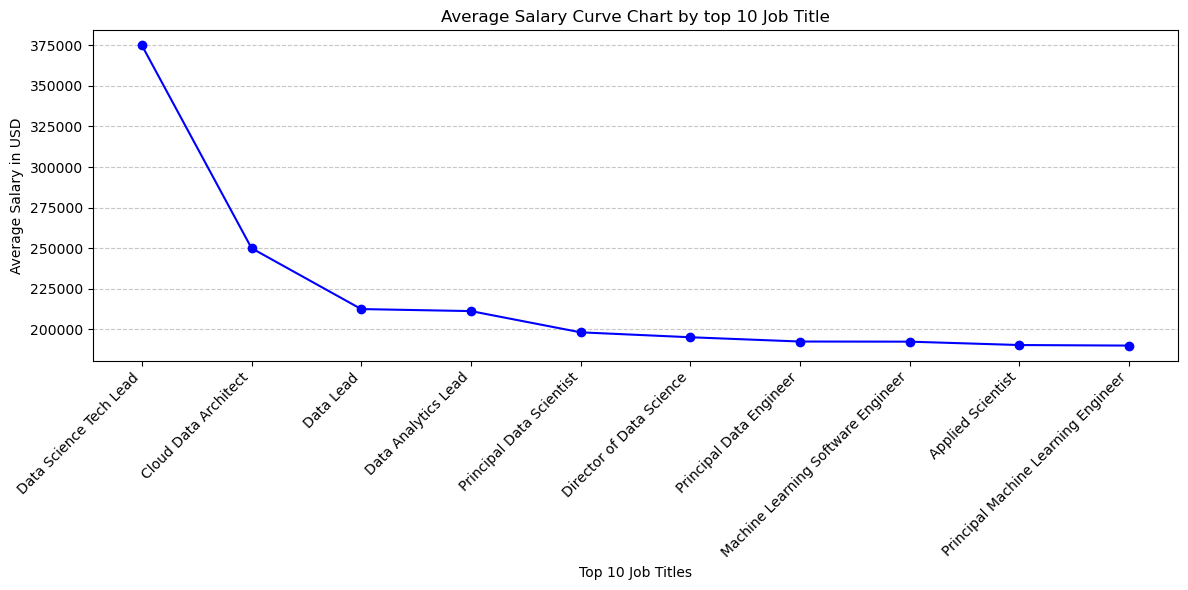

In [17]:
#ploting a curve chart for top ten job title by average salary
job_titles = [
    "Data Science Tech Lead",
    "Cloud Data Architect",
    "Data Lead",
    "Data Analytics Lead",
    "Principal Data Scientist",
    "Director of Data Science",
    "Principal Data Engineer",
    "Machine Learning Software Engineer",
    "Applied Scientist",
    "Principal Machine Learning Engineer",
]

salaries = [
    375000.00,
    250000.00,
    212500.00,
    211254.50,
    198171.12,
    195140.73,
    192500.00,
    192420.00,
    190342.58,
    190000.00,
]

# Create a curve chart
plt.figure(figsize=(12, 6))
plt.plot(job_titles, salaries, marker='o', linestyle='-', color='b')
plt.xlabel("Top 10 Job Titles")
plt.ylabel("Average Salary in USD")
plt.title("Average Salary Curve Chart by top 10 Job Title")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

#saving plot in output file
plt.savefig("output_data_AH/Fig6.png")

#show plot
plt.show()


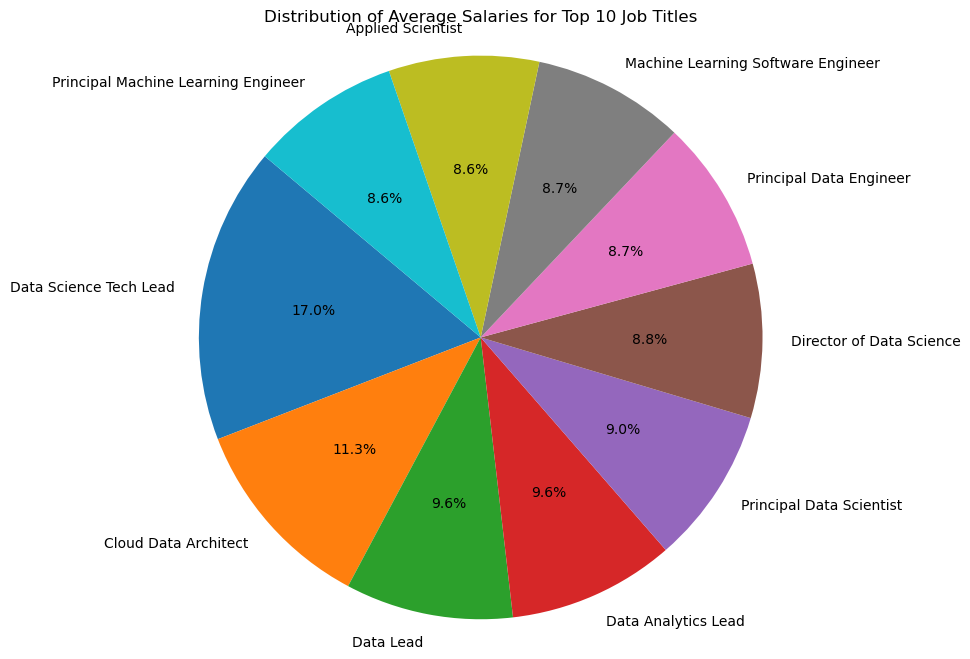

In [18]:
#ploting a pie chart for top ten job title by average salary
job_titles = [
    "Data Science Tech Lead",
    "Cloud Data Architect",
    "Data Lead",
    "Data Analytics Lead",
    "Principal Data Scientist",
    "Director of Data Science",
    "Principal Data Engineer",
    "Machine Learning Software Engineer",
    "Applied Scientist",
    "Principal Machine Learning Engineer",
]

salaries = [
    375000.00,
    250000.00,
    212500.00,
    211254.50,
    198171.12,
    195140.73,
    192500.00,
    192420.00,
    190342.58,
    190000.00,
]
plt.figure(figsize=(8, 8))
plt.pie(salaries, labels=job_titles, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Average Salaries for Top 10 Job Titles")

#saving plot in output file
plt.savefig("output_data_AH/Fig7.png")

#show plot
plt.show()



# Job Title Salary Distribution Analysis:
The analysis of job titles and their corresponding salaries in the field of data science reveals significant salary variation across different roles. High-paying positions like "Data Science Tech Lead" and "Cloud Data Architect" offer substantial salaries, reflecting the value of specialized skills and expertise. Leadership roles, such as "Director of Data Science," also command competitive compensation. The dataset highlights the diversity of career paths within data science, encompassing technical, research, and leadership roles. The choice of job title plays a crucial role in determining salary levels, as exemplified by the "Data Science Tech Lead" position. Salary disparities may be influenced by market demand and industry trends. This analysis underscores the importance of informed career decisions and the potential for career growth in the dynamic data science industry.

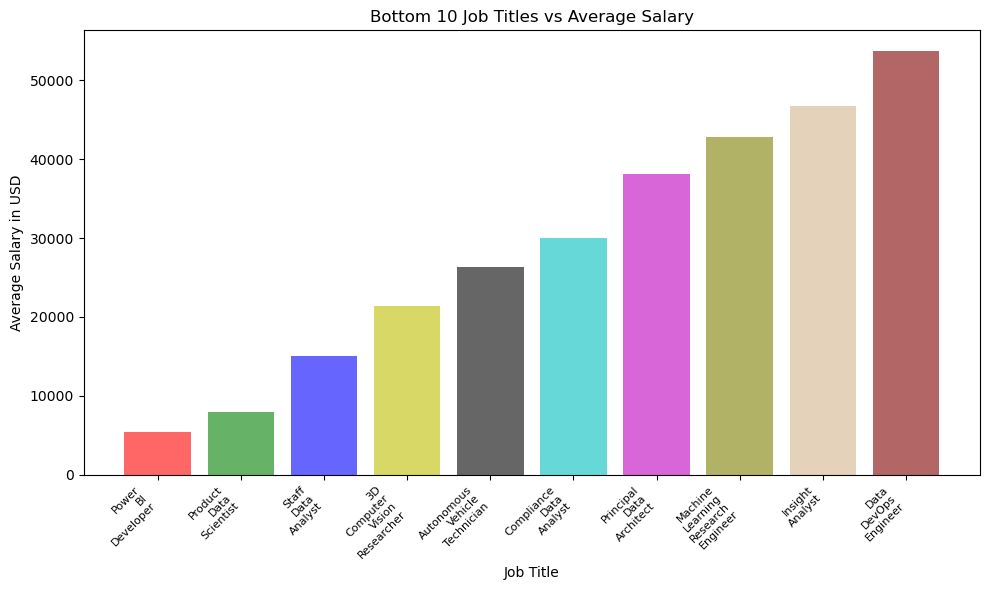

In [19]:
#calculating the bottom ten job titles by average salary 
bottom_10_salary_titles = title_salary_df.nsmallest(10, "Average_Salary_in_USD").reset_index()
bottom_10_salary_titles

#ploting a bar chart for bottom ten job titles by average salary
job_titles = [
    "Power BI Developer",
    "Product Data Scientist",
    "Staff Data Analyst",
    "3D Computer Vision Researcher",
    "Autonomous Vehicle Technician",
    "Compliance Data Analyst",
    "Principal Data Architect",
    "Machine Learning Research Engineer",
    "Insight Analyst",
    "Data DevOps Engineer",
]

salaries = [
    5409.00,
    8000.00,
    15000.00,
    21352.25,
    26277.50,
    30000.00,
    38154.00,
    42819.25,
    46786.00,
    53654.00,
]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
color= ["r","g","b","y","k","c","m","olive","tan","maroon"]

# Create the bar chart for bottom ten job titles
bars = ax.bar(range(len(job_titles)), salaries, color=color, alpha=0.60)

# Manually split x-tick labels into two lines
custom_xtick_labels = [title.replace(" ", "\n") for title in job_titles]

# Set x-tick positions and labels
ax.set_xticks(range(len(custom_xtick_labels)))
ax.set_xticklabels(custom_xtick_labels, fontsize=8, rotation=45, ha="right")

# Set labels and title
ax.set_xlabel("Job Title")
ax.set_ylabel("Average Salary in USD")
ax.set_title("Bottom 10 Job Titles vs Average Salary")

#saving plot to output
plt.savefig("output_data_AH/Fig8.png")

# Show the plot
plt.tight_layout()  
plt.show()




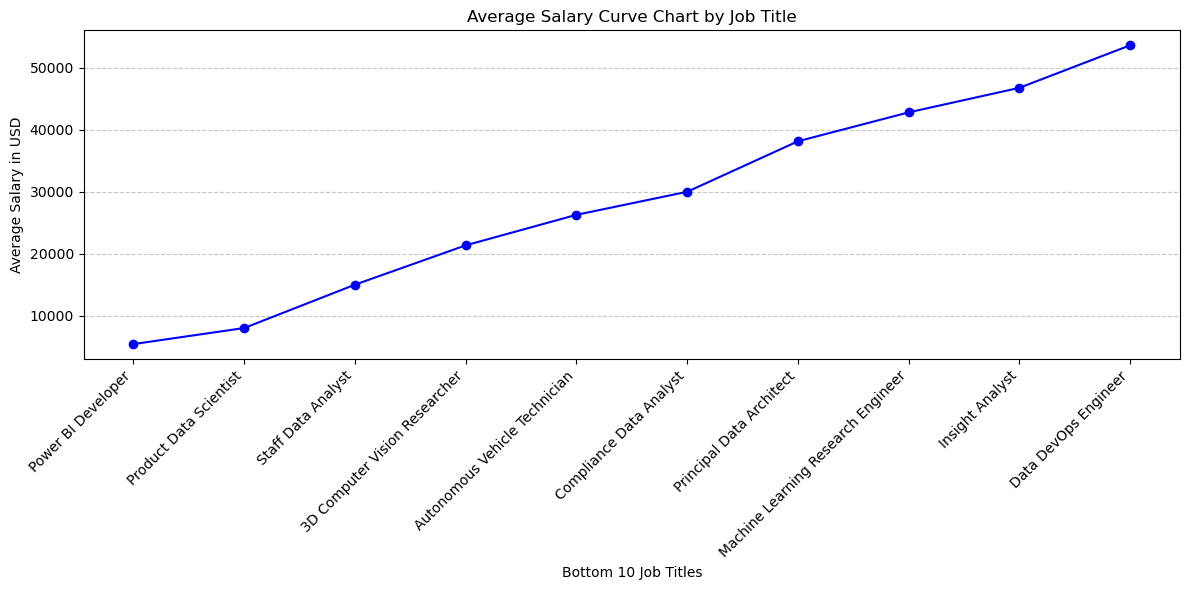

In [20]:
#ploting a curve chart for bottom ten job titles by average salary
plt.figure(figsize=(12, 6))
plt.plot(job_titles, salaries, marker='o', linestyle='-', color='b')
plt.xlabel("Bottom 10 Job Titles")
plt.ylabel("Average Salary in USD")
plt.title("Average Salary Curve Chart by Job Title")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ensure labels are not cut off

#saving plot in output file
plt.savefig("output_data_AH/Fig10.png")

#show plot
plt.show()


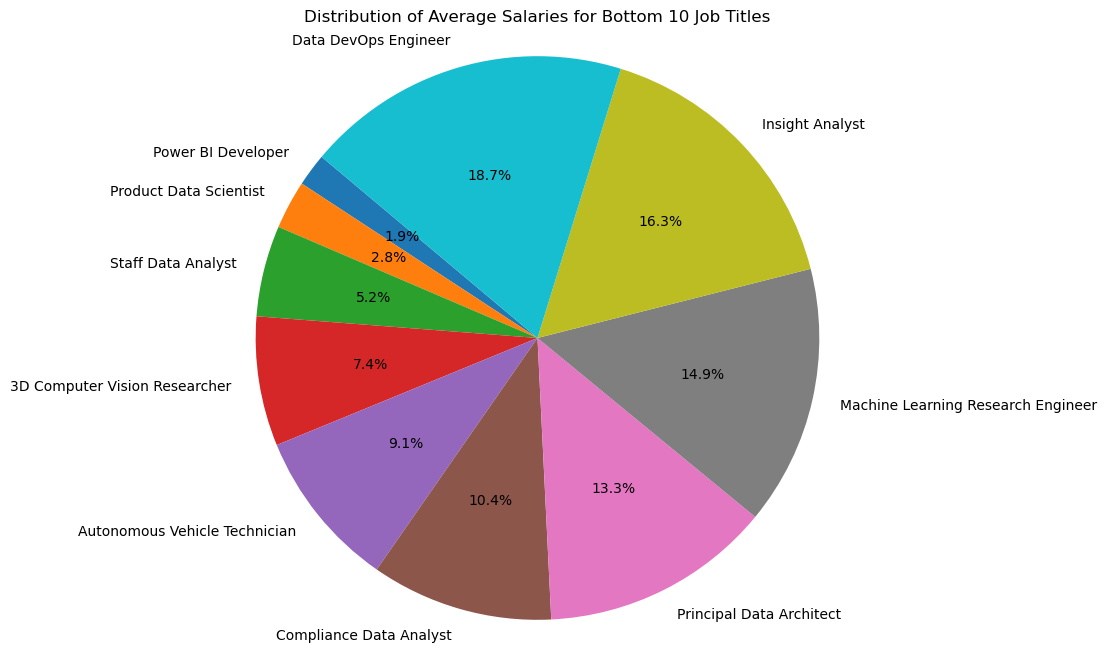

In [21]:
#ploting a pie chart for bottom ten job titles by average salary
job_titles = [
    "Power BI Developer",
    "Product Data Scientist",
    "Staff Data Analyst",
    "3D Computer Vision Researcher",
    "Autonomous Vehicle Technician",
    "Compliance Data Analyst",
    "Principal Data Architect",
    "Machine Learning Research Engineer",
    "Insight Analyst",
    "Data DevOps Engineer",
]

salaries = [
    5409.00,
    8000.00,
    15000.00,
    21352.25,
    26277.50,
    30000.00,
    38154.00,
    42819.25,
    46786.00,
    53654.00,

]
plt.figure(figsize=(8, 8))
plt.pie(salaries, labels=job_titles, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Average Salaries for Bottom 10 Job Titles")

#saving plot in output file
plt.savefig("output_data_AH/Fig9.png")

#show plot
plt.show()


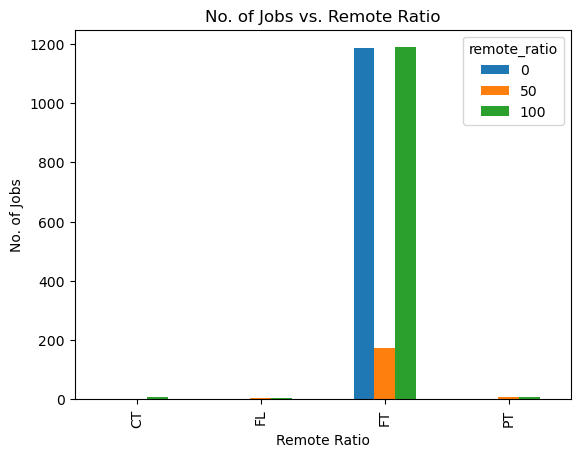

In [22]:
#pivotplot for employment type vs remote ratio
reduced_df=df.groupby(["employment_type"]).remote_ratio.value_counts().reset_index(name="no_of_jobs")
largest_five_residence_series=reduced_df.groupby(["employment_type"])["no_of_jobs"].sum().nlargest(5)
new_df=largest_five_residence_series.to_frame().reset_index()
final_df_largefive= reduced_df[reduced_df["employment_type"].isin(new_df["employment_type"])]
final_df_largefive

pivot_dataframe_plotting=final_df_largefive.pivot(index="employment_type", columns ="remote_ratio", values= "no_of_jobs")
pivot_dataframe_plotting.plot(kind="bar")
plt.title('No. of Jobs vs. Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('No. of Jobs')
plt.savefig("output_data_AH/Fig11.pdf")
plt.show()

In [23]:
final_df_largefive.value_counts()

employment_type  remote_ratio  no_of_jobs
CT               50            1             1
                 100           9             1
FL               0             1             1
                 50            4             1
                 100           5             1
FT               0             1185          1
                 50            174           1
                 100           1188          1
PT               50            8             1
                 100           9             1
dtype: int64

# NIDHI NIGAM

1. Reading Data and cleanup

2. Univariant analysis (1. Employement Type 2. Company Locations)

3. Bivariant analysis (1. Salary vs work year 2. Salary vs Remote ratio )

4. multivariant analysis (1. Job Count Vs Job Title By Remote Ratio 2. Job Count VS Work   
   Year By Remote Ratio 3. Job Count VS Employment Type By Remote Ratio 4. Job Count VS      Job Titles By Company Size)

In [1]:
#1.Dataframe overview and cleanup

# Dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st        
import numpy as np
import statistics as stat


#Reading the Data Set
df=pd.read_csv("./ds_salaries.csv")
df.head()

# DATA CLEANING

# Checking for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

#Checking for null values
df.isna().sum()

#Find duplicate rows
duplicate_rows = df[df.duplicated()]
#Remove duplicate rows
df = df.drop_duplicates()
df

#dropiing the same information column for salary
df=df.drop(['salary','salary_currency'], axis=1)

#renaming employment types 
df['employment_type']=df['employment_type'].replace("FT", "Full-time")
df['employment_type']=df['employment_type'].replace("PT", "Part-time")
df['employment_type']=df['employment_type'].replace("CT", "Contractual")
df['employment_type']=df['employment_type'].replace("FL", "Freelancer")

#renaming company size
df['company_size']=df['company_size'].replace("L", "Large")
df['company_size']=df['company_size'].replace("M", "Medium")
df['company_size']=df['company_size'].replace("S", "Small")

df.head()

df.to_csv("output_data_NN/salaries.csv")

#Finding the number of rows and column of Data set
a, b = df.shape
print("Data_Set shape: rows {} & columns {}".format(a, b))

df.info()

df.describe()

Data_Set shape: rows 2584 & columns 9
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary_in_usd       2584 non-null   int64 
 5   employee_residence  2584 non-null   object
 6   remote_ratio        2584 non-null   int64 
 7   company_location    2584 non-null   object
 8   company_size        2584 non-null   object
dtypes: int64(3), object(6)
memory usage: 201.9+ KB


,work_year,salary_in_usd,remote_ratio
count,2584.000000,2584.000000,2584.000000
mean,2022.301084,133409.280186,50.483746
std,0.749179,67136.837329,48.163707
min,2020.000000,5132.000000,0.000000
25%,2022.000000,84975.000000,0.000000
50%,2022.000000,130000.000000,50.000000
75%,2023.000000,175000.000000,100.000000
max,2023.000000,450000.000000,100.000000


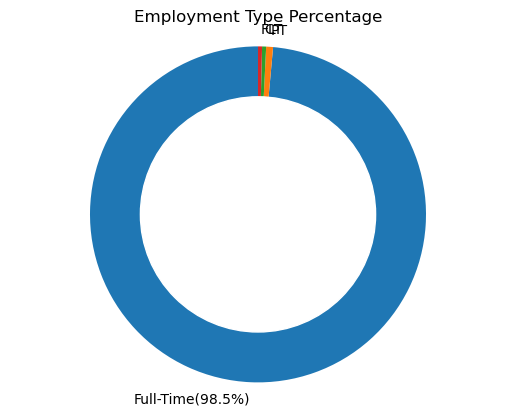

In [2]:
# Univariant Analysis (Employement Type)

employment_type = df["employment_type"].value_counts()
employment_type

# Employment_Type (Univariant Analysis)
employment_type = df["employment_type"].value_counts()

labels=["Full-Time(98.5%)", "PT", "CT", "FL"]
counts = [2547, 17, 10, 10]

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(counts,labels=labels, startangle=90)

# Draw a white circle in the middle to create the donut effect
circle = plt.Circle((0, 0), 0.7, color='white')
ax.add_artist(circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
plt.title('Employment Type Percentage')



# Saving Plot to output_data_NN

plt.savefig("output_data_NN/Fig1_employtype.png")
plt.show()


# ANALYSIS - After the univariant analysis of this dataset for the employment type,the conclusion can be that 98.56% of Data Science Jobs
#falls in to Full Time employemnet type.


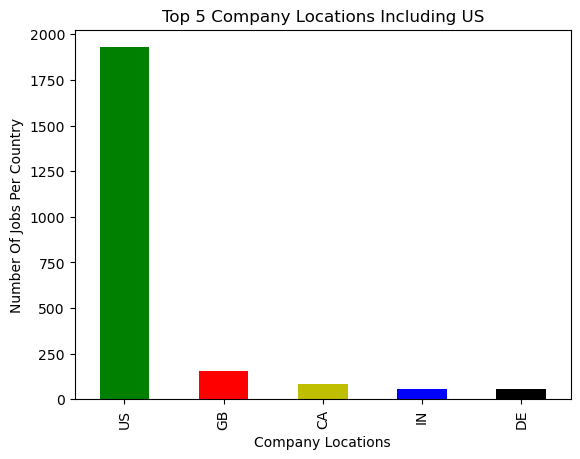

In [4]:
# Univariant Analysis (Company Locations)

#Top 5 company loations (including US)

company_locations_counts=df["company_location"].value_counts()
top5_company_locations_us= company_locations_counts.head(5)

top5_company_locations_us.plot(
    kind="bar",
    color=["g","r","y","b","k"],
    title="Top 5 Company Locations Including US",
    ylabel = "Number Of Jobs Per Country", 
    xlabel ="Company Locations",

)
# Saving Plot to output_data_NN
plt.savefig("output_data_NN/Fig2_complocs.png")
plt.show()



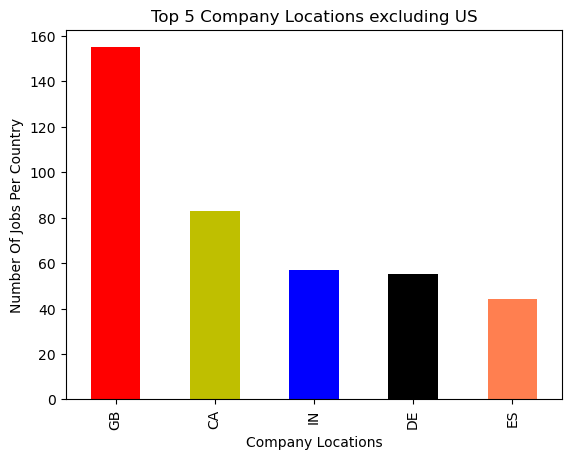

In [5]:
#Top 5 company loations (Excluding US)

new_df = df[df["company_location"]!= "US"]
new_df
company_location_counts = new_df["company_location"].value_counts()
top5_company_location = company_location_counts.head()
top5_company_location.plot(
    kind="bar",
    color=["r","y","b","k","coral"],
    title="Top 5 Company Locations excluding US",
    ylabel = "Number Of Jobs Per Country", 
    xlabel ="Company Locations",
    
)

# Saving Plot to output_data_NN
plt.savefig("output_data_NN/Fig2_complocs_noUS.png")
plt.show()



#ANALYSIS - #After looking in to the univariant anlysis, We may see that the companies located in USA 
#is already hosting more than 90% of the jobs. If we remove the USA from the anaysis, The next five countries for stake 
#holders to experience a good competition, will be Great Britain, Canada, India , Germany and Spain. 


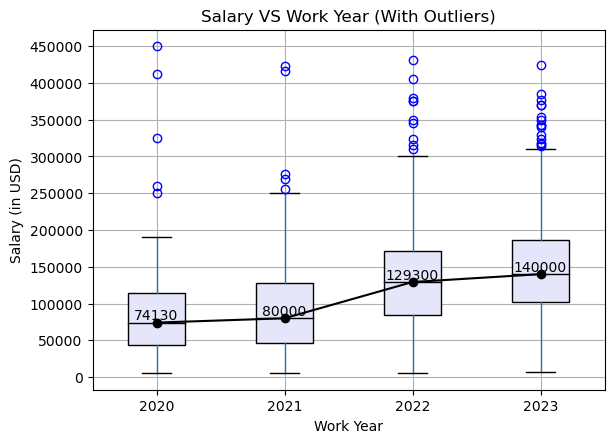

In [6]:
# Pair Plotting or Bivariant Analysis (Salary VS Work Year)

import matplotlib.pyplot as plt

a = "blue"
b = "black"
c = "lavender"

# Calculate median values
medians = df.groupby("work_year")["salary_in_usd"].median()
median_positions = range(1, len(medians) + 1)

# Create the boxplot
boxplot = df.boxplot(
    column=["salary_in_usd"],
    by=["work_year"],
    patch_artist=True,
    boxprops=dict(facecolor=c),
    flierprops=dict(color=a, markeredgecolor=a),
    medianprops=dict(color=b),
)

# Add median values as annotations inside the box
for i, med in enumerate(medians):
    plt.text(median_positions[i], med, f"{med:.0f}", ha="center", va="bottom", color=b)

# Draw lines connecting the medians
plt.plot(median_positions, medians, marker='o', color=b, linestyle='-')

plt.title("Salary VS Work Year (With Outliers)")
plt.xlabel("Work Year")
plt.ylabel("Salary (in USD)")
plt.suptitle("")  # This removes the automatic title generated by boxplot()
plt.xticks(ticks=median_positions, labels=medians.index)  # Set x-tick labels to be work years

y_ticks = np.arange(0, 500000, 50000)
plt.yticks(y_ticks)

# Saving Plot to output_data_NN
plt.savefig("output_data_NN/Fig3_salary_workyear_outliers.png")

plt.show()


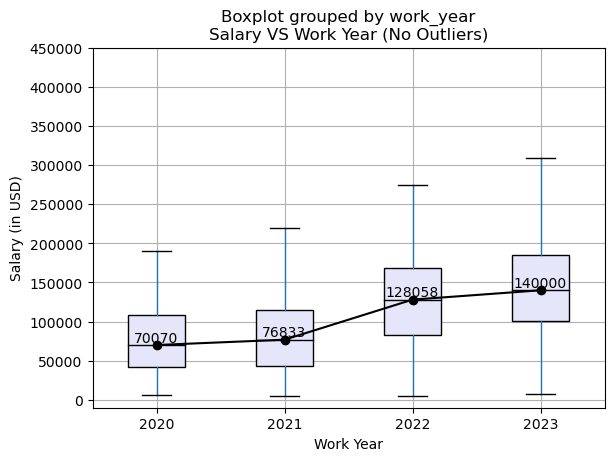

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Removing outliers in salary_in_usd for different categories of experience_level
df_remove_outlier1 = df[(df["salary_in_usd"] < 250000) & (df["work_year"] == 2020)]
df_remove_outlier2 = df[(df["salary_in_usd"] < 225000) & (df["work_year"] == 2021)]
df_remove_outlier3 = df[(df["salary_in_usd"] < 295000) & (df["work_year"] == 2022)]
df_remove_outlier4 = df[(df["salary_in_usd"] < 310000) & (df["work_year"] == 2023)]

# Concatenate the filtered dataframes
dataframes = [df_remove_outlier1, df_remove_outlier2, df_remove_outlier3, df_remove_outlier4]
final_df_remove_outlier = pd.concat(dataframes)

# Set option to display all rows in the dataframe
pd.set_option('display.max_rows', None)

# Calculate median values
medians1 = final_df_remove_outlier.groupby("work_year")["salary_in_usd"].median()
median_positions = range(1, len(medians1) + 1)

# Create the boxplot
final_df_remove_outlier.boxplot(
    column=["salary_in_usd"],
    by=["work_year"],
    patch_artist=True,
    boxprops=dict(facecolor=c),
    flierprops=dict(color=a, markeredgecolor=a),
    medianprops=dict(color=b)
)

# Add median values as annotations
for i, med in enumerate(medians1):
    plt.text(median_positions[i], med, f"{med:.0f}", ha="center", va="bottom", color=b)

# Draw lines connecting the medians
plt.plot(median_positions, medians1, marker='o', color=b, linestyle='-')

plt.title('Salary VS Work Year (No Outliers)')
plt.xlabel('Work Year')
plt.ylabel('Salary (in USD)')

y_ticks = np.arange(0, 500000, 50000)
plt.yticks(y_ticks)

# Saving Plot to output_data_NN
plt.savefig("output_data_NN/Fig3_salary_workyear_nooutliers.png")
plt.show()

# ANALYSIS - This data do have a lot of outliers, and median salary levels drop significantly after removing outliers. But with or without outliers,
# after comparing the box plot, we can deduce that median salaries were almost the same in the years 2020 and 2021. However, in the years 2022 and 2023, they experienced a substantial increase.


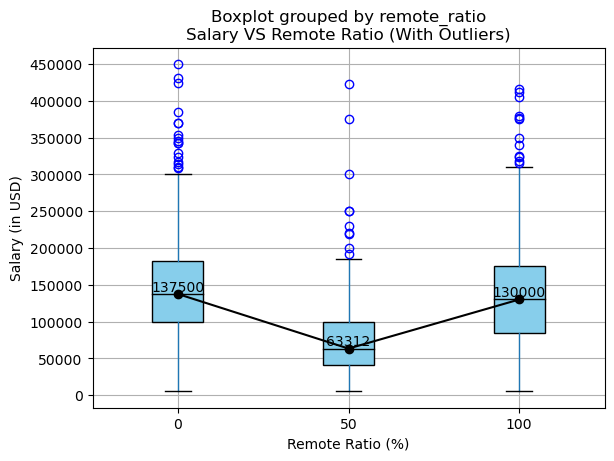

In [8]:
# Pair Plotting or Bivariant Analysis (Salary VS Remote Ratio)

import matplotlib.pyplot as plt

a = "blue"
b = "black"
c = "skyblue"

# Calculate median values
medians2 = df.groupby("remote_ratio")["salary_in_usd"].median()
median_positions = range(1, len(medians2) + 1)

# Create the boxplot
df.boxplot(
    column=["salary_in_usd"],
    by=["remote_ratio"],
    patch_artist=True,
    boxprops=dict(facecolor=c),
    flierprops=dict(color=a, markeredgecolor=a),
    medianprops=dict(color=b)
)

plt.title('Salary VS Remote Ratio (With Outliers)')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Salary (in USD)')

# Add median values as annotations
for i, med in enumerate(medians2):
    plt.text(median_positions[i], med, f"{med:.0f}", ha="center", va="bottom", color=b)

# Draw lines connecting the medians
plt.plot(median_positions, medians2, marker='o', color=b, linestyle='-')

y_ticks = range(0, 500000, 50000)
plt.yticks(y_ticks)

# Saving Plot to output_data_NN
plt.savefig("output_data_NN/Fig4_salary_remoteratio_outliers.png")
plt.show()


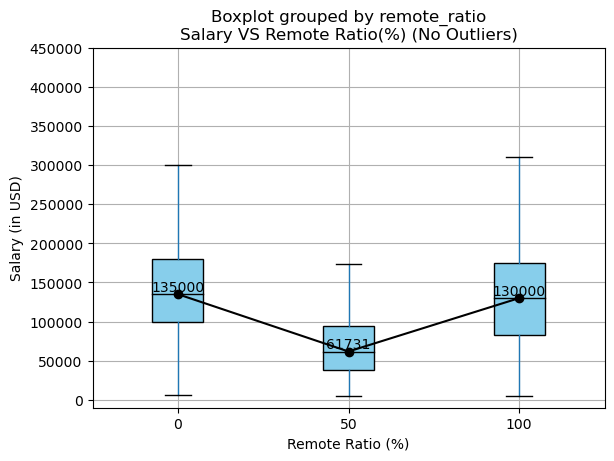

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Removing outliers in salary_in_usd for different categories of remote_ratio
df_remove_outliera = df[(df["salary_in_usd"] < 300000) & (df["remote_ratio"] == 0)]
df_remove_outlierb = df[(df["salary_in_usd"] < 185000) & (df["remote_ratio"] == 50)]
df_remove_outlierc = df[(df["salary_in_usd"] < 315000) & (df["remote_ratio"] == 100)]

# Concatenate the filtered dataframes
dataframes = [df_remove_outliera, df_remove_outlierb, df_remove_outlierc]
final_df_remove_outlierr = pd.concat(dataframes)

# Set option to display all rows in the dataframe
pd.set_option('display.max_rows', None)

# Calculate median values
medians3 = final_df_remove_outlierr.groupby("remote_ratio")["salary_in_usd"].median()
median_positions = range(1, len(medians3) + 1)

# Create the boxplot
final_df_remove_outlierr.boxplot(
    column=["salary_in_usd"],
    by=["remote_ratio"],
    patch_artist=True,
    boxprops=dict(facecolor=c),
    flierprops=dict(color=a, markeredgecolor=a),
    medianprops=dict(color=b)
)

# Add median values as annotations
for i, med in enumerate(medians3):
    plt.text(median_positions[i], med, f"{med:.0f}", ha="center", va="bottom", color=b)

# Draw lines connecting the medians
plt.plot(median_positions, medians3, marker='o', color=b, linestyle='-')

plt.title('Salary VS Remote Ratio(%) (No Outliers)')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Salary (in USD)')

y_ticks = np.arange(0, 500000, 50000)
plt.yticks(y_ticks)

# Saving Plot to output_data_NN
plt.savefig("output_data_NN/Fig4_salary_remoteratio_nooutliers.png")
plt.show()

# ANALYSIS - Similar to the previous case, this data also had a lot of outliers, and median salary levels dropped significantly after removing outliers.
# But with or without outliers, after comparing the box plot, we can deduce that median salaries were substantially lower for the hybrid model as compared to fully remote or in-office work models.


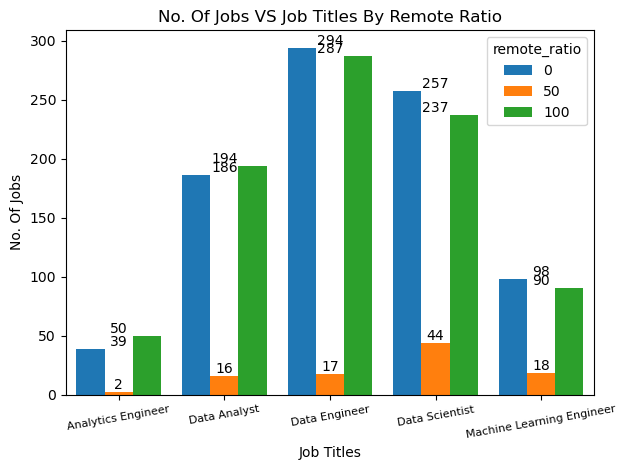

In [10]:
# Multivariant Analysis (No. Of Jobs VS Job Titles By Remote Ratio)

# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st        
import numpy as np
import statistics as stat

# Reading the Data Set
df = pd.read_csv("./ds_salaries.csv")
df.head()

# DATA CLEANING

# Checking for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

# Checking for null values
df.isna().sum()

# Find duplicate rows
duplicate_rows = df[df.duplicated()]
# Remove duplicate rows
df = df.drop_duplicates()
df

# JOB TITLE VS REMOTE RATIO

reduced_dataframe = df.groupby(["job_title"]).remote_ratio.value_counts().reset_index(name="no_of_jobs")
largest_five_residence_series = reduced_dataframe.groupby(["job_title"])["no_of_jobs"].sum().nlargest(5)
making_dataframe = largest_five_residence_series.to_frame().reset_index()
final_dataframe_largefive_residence = reduced_dataframe[reduced_dataframe["job_title"].isin(making_dataframe["job_title"])]
pivot_dataframe_plotting = final_dataframe_largefive_residence.pivot(index="job_title", columns="remote_ratio", values="no_of_jobs")


# Calculate the width of the bars (adjust the value as needed)
bar_width = 0.8

# Plotting the bar chart with adjusted bar width
ax = pivot_dataframe_plotting.plot(kind="bar", width=bar_width)

# Add labels for each bar's value on top of the bar
for i in range(len(pivot_dataframe_plotting)):
    for j in range(len(pivot_dataframe_plotting.columns)):
        value = pivot_dataframe_plotting.iloc[i, j]
        ax.text(i, value, str(value), ha='center', va='bottom', fontsize=10)  # Adjust 'va' to 'bottom'

plt.xticks(rotation=10, fontsize=8)
plt.title('No. Of Jobs VS Job Titles By Remote Ratio')
plt.xlabel('Job Titles')
plt.ylabel('No. Of Jobs')

# Adjust the x-axis limits to increase its length
plt.xlim(-0.5, len(pivot_dataframe_plotting) - 0.5)

plt.tight_layout()  # Ensures that labels do not overlap
plt.savefig("output_data_NN/Fig5_salary_remote_ratio.png")

plt.show()

# ANALYSIS - We can easily analyze from the plot that for every job title,
# Hybrid model was not favorable; however, fully
# remote or on-site work models are preferable by companies.


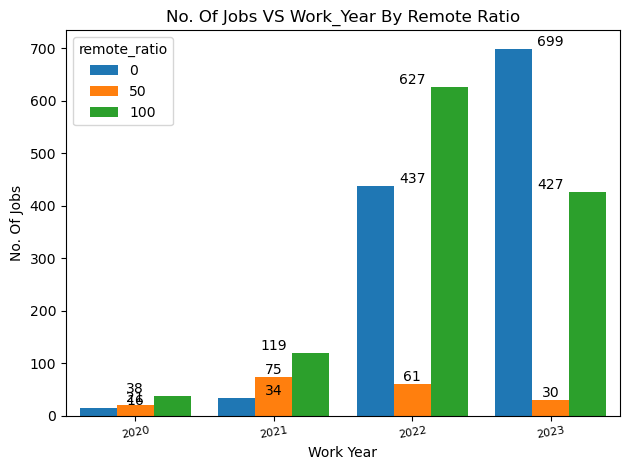

In [11]:
# Multivariant Analysis (No. Of Jobs VS Work Year By Remote Ratio)


reduced_dataframe = df.groupby(["work_year"]).remote_ratio.value_counts().reset_index(name="no_of_jobs")
largest_five_residence_series = reduced_dataframe.groupby(["work_year"])["no_of_jobs"].sum().nlargest(5)
making_dataframe = largest_five_residence_series.to_frame().reset_index()
final_dataframe_largefive_residence = reduced_dataframe[reduced_dataframe["work_year"].isin(making_dataframe["work_year"])]
pivot_dataframe_plotting = final_dataframe_largefive_residence.pivot(index="work_year", columns="remote_ratio", values="no_of_jobs")


# Calculate the width of the bars (adjust the value as needed)
bar_width = 0.8

# Plotting the bar chart with adjusted bar width
ax = pivot_dataframe_plotting.plot(kind="bar", width=bar_width)

# Add labels for each bar's value on top of the bar
for i in range(len(pivot_dataframe_plotting)):
    for j in range(len(pivot_dataframe_plotting.columns)):
        value = pivot_dataframe_plotting.iloc[i, j]
        ax.text(i, value, str(value), ha='center', va='bottom', fontsize=10)  # Adjust 'va' to 'bottom'

plt.xticks(rotation=10, fontsize=8)
plt.title('No. Of Jobs VS Work_Year By Remote Ratio')
plt.xlabel('Work Year')
plt.ylabel('No. Of Jobs')

# Adjust the x-axis limits to increase its length
plt.xlim(-0.5, len(pivot_dataframe_plotting) - 0.5)


plt.tight_layout()  # Ensures that labels do not overlap
plt.savefig("output_data_NN/Fig6_workyear_remote_ratio.png")

plt.show()

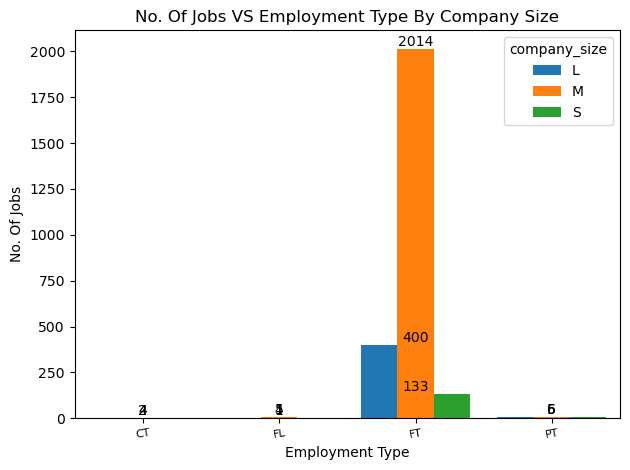

In [13]:
# Multivariant Analysis (No. Of Jobs VS Employment Type By Remote Ratio)

reduced_dataframe = df.groupby(["employment_type"]).company_size.value_counts().reset_index(name="no_of_jobs")
largest_five_residence_series = reduced_dataframe.groupby(["employment_type"])["no_of_jobs"].sum().nlargest(5)
making_dataframe = largest_five_residence_series.to_frame().reset_index()
final_dataframe_largefive_residence = reduced_dataframe[reduced_dataframe["employment_type"].isin(making_dataframe["employment_type"])]
pivot_dataframe_plotting = final_dataframe_largefive_residence.pivot(index="employment_type", columns="company_size", values="no_of_jobs")


# Calculate the width of the bars (adjust the value as needed)
bar_width = 0.8

# Plotting the bar chart with adjusted bar width
ax = pivot_dataframe_plotting.plot(kind="bar", width=bar_width)

# Add labels for each bar's value on top of the bar
for i in range(len(pivot_dataframe_plotting)):
    for j in range(len(pivot_dataframe_plotting.columns)):
        value = pivot_dataframe_plotting.iloc[i, j]
        ax.text(i, value, str(value), ha='center', va='bottom', fontsize=10)  # Adjust 'va' to 'bottom'

plt.xticks(rotation=10, fontsize=8)
plt.title('No. Of Jobs VS Employment Type By Company Size')
plt.xlabel('Employment Type')
plt.ylabel('No. Of Jobs')

# Adjust the x-axis limits to increase its length
plt.xlim(-0.5, len(pivot_dataframe_plotting) - 0.5)

plt.tight_layout()  # Ensures that labels do not overlap
plt.savefig("output_data_NN/Fig7_employtype_companysize.png")

plt.show()


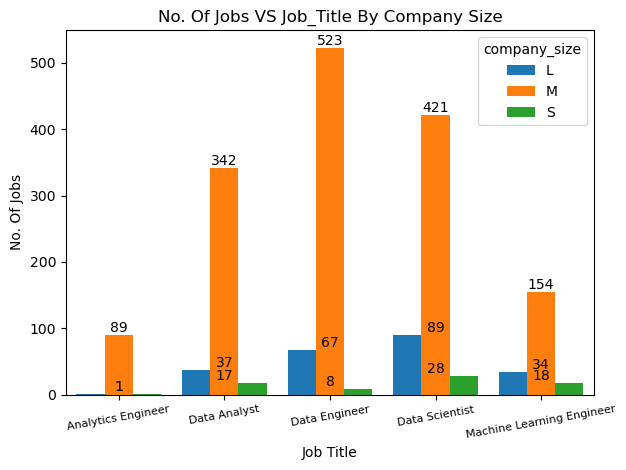

In [14]:
# Multivariant Analysis (No. Of Jobs VS Job Titles By Company Size)


reduced_dataframe = df.groupby(["job_title"]).company_size.value_counts().reset_index(name="no_of_jobs")
largest_five_residence_series = reduced_dataframe.groupby(["job_title"])["no_of_jobs"].sum().nlargest(5)
making_dataframe = largest_five_residence_series.to_frame().reset_index()
final_dataframe_largefive_residence = reduced_dataframe[reduced_dataframe["job_title"].isin(making_dataframe["job_title"])]
pivot_dataframe_plotting = final_dataframe_largefive_residence.pivot(index="job_title", columns="company_size", values="no_of_jobs")


# Calculate the width of the bars (adjust the value as needed)
bar_width = 0.8

# Plotting the bar chart with adjusted bar width
ax = pivot_dataframe_plotting.plot(kind="bar", width=bar_width)

# Add labels for each bar's value on top of the bar
for i in range(len(pivot_dataframe_plotting)):
    for j in range(len(pivot_dataframe_plotting.columns)):
        value = pivot_dataframe_plotting.iloc[i, j]
        ax.text(i, value, str(value), ha='center', va='bottom', fontsize=10)  # Adjust 'va' to 'bottom'

plt.xticks(rotation=10, fontsize=8)
plt.title('No. Of Jobs VS Job_Title By Company Size')
plt.xlabel('Job Title')
plt.ylabel('No. Of Jobs')

# Adjust the x-axis limits to increase its length
plt.xlim(-0.5, len(pivot_dataframe_plotting) - 0.5)

plt.tight_layout()  # Ensures that labels do not overlap
plt.savefig("output_data_NN/Fig8_jobtitle_companysize.png")

plt.show()


# Garima Chaudhary:
1. Dataframe overview and cleanup
2. Univariate analysis (Remote ratio, Company size)
3. Bivariate analysis (Salary vs Experience Level, Salary(in USD) vs company size, Experience level vs Employee residence,Employment type vs Employee residence, Employment type vs Experience level, Employee residence vs company size, company size vs company location)
4. multivariant analysis (Median Salary vs Remote work ratio vs job count)



# Garima Chaudhary:
Dataframe overview and cleanup
Univariate analysis (Remote ratio, Company size)
Bivariate analysis (Salary vs Experience Level, Salary(in USD) vs company size, Experience level vs Employee residence,Employment type vs Employee residence, Employment type vs Experience level, Employee residence vs company size, company size vs company location)
multivariant analysis (Median Salary vs Remote work ratio vs job count)

Dataframe overview and cleanup

In [1]:
#Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statistics as stats

#read csv file and display first few rows

salary = "./ds_salaries.csv"
df=pd.read_csv(salary)
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [2]:
#find number or rows and columns in the dataframe

rows=len(df.axes[0])
columns=len(df.axes[1])
print(f"No. of rows in dataframe: {rows}\nNo. of columns in dataframe: {columns}")

#Dataset has 3755 rows and 11 columns

No. of rows in dataframe: 3755
No. of columns in dataframe: 11


In [3]:
#Checking any empty cells in the dataset

empty_values = df.isna().sum()
empty_values

#No empty values in any column

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [4]:
#Dropping the redundant columns for salary and salary currency as they are inbuilt in salary(in USD)

df=df.drop(['salary','salary_currency'], axis=1)
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [5]:
# Finding duplicate rows for all columns

duplicate_rows = df[df.duplicated()]
duplicate_rows


#Found total 1171 duplicate rows

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,US,100,US,L


In [6]:
# Remove duplicate rows

df_clean = df.drop_duplicates(keep="first", inplace=False)
df_clean

#After removing duplicate rows, we are left with 2584 rows dataframe

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [7]:
#exporting cleaned csv file to the output folder

df_clean.to_csv("output_data_GC/salaries.csv")

In [8]:
#Applying .info() method on the dataframe to get summary of the dataframe

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary_in_usd       2584 non-null   int64 
 5   employee_residence  2584 non-null   object
 6   remote_ratio        2584 non-null   int64 
 7   company_location    2584 non-null   object
 8   company_size        2584 non-null   object
dtypes: int64(3), object(6)
memory usage: 201.9+ KB


In [9]:
# Fnding different entries in each column

for column in df_clean.columns:
    entries = {column: df_clean[column].value_counts()} 

    print (f"\n{entries}")

          


{'work_year': 2023    1156
2022    1125
2021     228
2020      75
Name: work_year, dtype: int64}

{'experience_level': SE    1554
MI     664
EN     270
EX      96
Name: experience_level, dtype: int64}

{'employment_type': FT    2547
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64}

{'job_title': Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
                            ... 
Compliance Data Analyst        1
Deep Learning Researcher       1
Staff Data Analyst             1
Data DevOps Engineer           1
Finance Data Analyst           1
Name: job_title, Length: 93, dtype: int64}

{'salary_in_usd': 100000    58
150000    56
120000    51
200000    47
130000    39
          ..
314100     1
195800     1
262500     1
209450     1
94665      1
Name: salary_in_usd, Length: 1035, dtype: int64}

{'employee_residence': US    1893
GB     150
CA      81
IN     

In [10]:
#Descriptive Statistics for numerical columns 

describe_summary = df_clean.describe()
describe_summary

,work_year,salary_in_usd,remote_ratio
count,2584.000000,2584.000000,2584.000000
mean,2022.301084,133409.280186,50.483746
std,0.749179,67136.837329,48.163707
min,2020.000000,5132.000000,0.000000
25%,2022.000000,84975.000000,0.000000
50%,2022.000000,130000.000000,50.000000
75%,2023.000000,175000.000000,100.000000
max,2023.000000,450000.000000,100.000000


Univariate analysis

In [11]:
#Distribution Analysis: Visualize the distribution of variables like remote_ratio and company_size.

#Salary Analysis: Analyze how the salary varies with factors like experience_level, company_size.

#Categorical Analysis: Analyze how is the distribution of categorical variables like experience_level and employe_residence with count of jobs.


In [12]:
#finding out counts for jobs for different remote_ratio categories and sorting the index in increasing order

remote_work= df_clean["remote_ratio"].value_counts().sort_index()
remote_work

0      1186
50      187
100    1211
Name: remote_ratio, dtype: int64

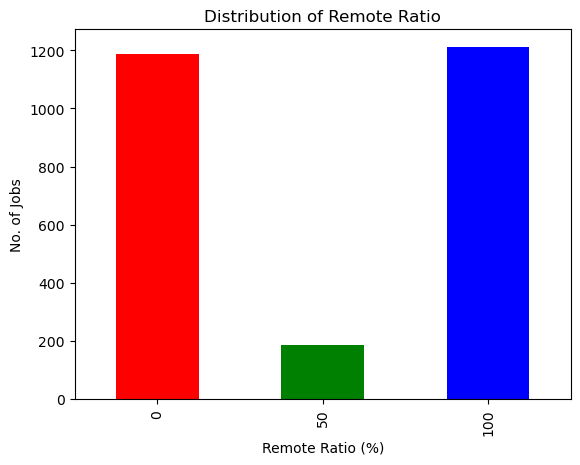

In [13]:
# Plotting the distribution of remote_ratio

my_colors=['red', 'green', 'blue']
remote_work.plot(kind="bar", color = my_colors)
plt.title('Distribution of Remote Ratio')
plt.xlabel("Remote Ratio (%)")
plt.ylabel("No. of Jobs")
plt.savefig("output_data_GC/Fig1_distribution_remote_ratio.png")
plt.show()

#A significant number(45.89%) of employees do not work remotely at all (0% remote ratio). 
#Another substantial group (46.86%) works fully remotely (100% remote ratio). 
#Only a small fraction(7.23%) of employees have a 50% remote work arrangement.

In [14]:
#finding out counts of jobs for different company_size categories to show distribution of data science jobs by company size

jobs_by_company_size = df_clean["company_size"].value_counts()
jobs_by_company_size

M    2028
L     409
S     147
Name: company_size, dtype: int64

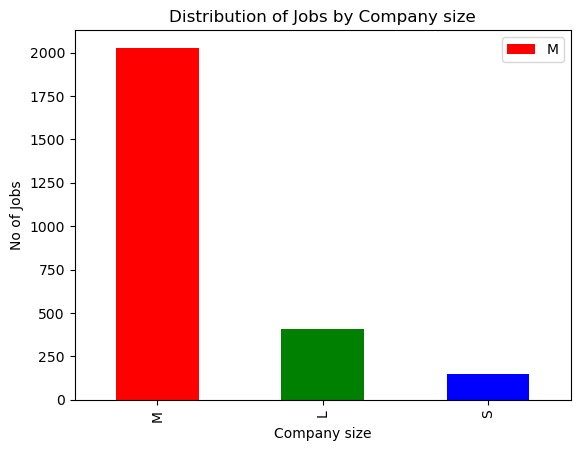

In [15]:
# Plotting the distribution of jobs by company size

my_colors=['red', 'green', 'blue']
jobs_by_company_size.plot(kind="bar", color = my_colors)
plt.title('Distribution of Jobs by Company size')
plt.xlabel("Company size")
plt.ylabel("No of Jobs")
plt.legend(loc="best", labels="M-Medium")
plt.savefig("output_data_GC/Fig2_distribution_jobs_company_size.png")
plt.show()

#A significant number (78.48%) of individuals work for medium(M)-sized companies, followed by 15.82% work for large(L) and then 5.68% work for small(S) size companies. 


Bivariate analysis

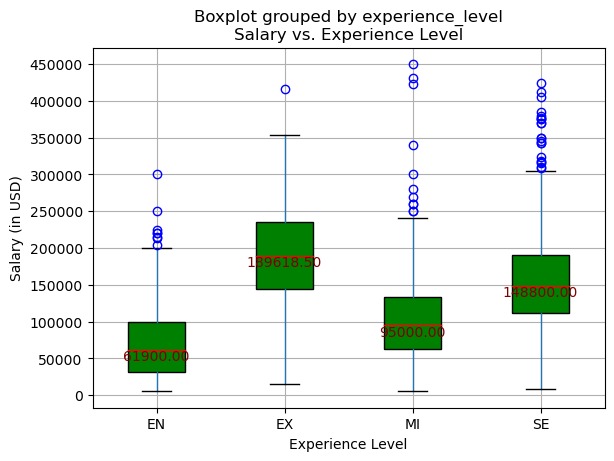

In [16]:
# Salary vs. Experience Level
a="blue"
b="red"
c="green"

# Calculate median values
medians = df_clean.groupby("experience_level")["salary_in_usd"].median()

#plotting the boxplot
df_clean.boxplot(column=["salary_in_usd"], by=["experience_level"], patch_artist=True, boxprops=dict(facecolor=c), flierprops=dict(color=a, markeredgecolor=a), medianprops=dict(color=b))

# Add median values as annotations
for i, med in enumerate(medians):
    plt.text(i + 1, med, f"{med:.2f}", ha="center", va="top", color="maroon")

plt.title('Salary vs. Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (in USD)')

y_ticks = np.arange(0, 500000, 50000)
plt.yticks(y_ticks)

plt.savefig("output_data_GC/Fig3_salary_experience_level.png")
plt.show()

#There's a clear trend that as experience level increases, the median salary also increases. 
#The Executive-level (EX) experience has the highest median salary, followed by Entry-level(EN), Mid-level (MI), and Senior-level (SE). 
#The spread of salaries (as shown by the height of the boxes) also seems to increase with experience, indicating more variability in salaries for more experienced roles.

In [17]:
# Removing outliers in salary_in_usd for different categories of experience_level: Salary vs. Experience Level 


df_remove_outlier1=df_clean[(df_clean["salary_in_usd"]<400000)&(df_clean["experience_level"]=="EX")]
df_remove_outlier2=df_clean[(df_clean["salary_in_usd"]<200000)&(df_clean["experience_level"]=="EN")]
df_remove_outlier3=df_clean[(df_clean["salary_in_usd"]<240000)&(df_clean["experience_level"]=="MI")]
df_remove_outlier4=df_clean[(df_clean["salary_in_usd"]<309000)&(df_clean["experience_level"]=="SE")]
dataframes = [df_remove_outlier1,df_remove_outlier2, df_remove_outlier3, df_remove_outlier4]
final_df_remove_outlier =pd.concat(dataframes)
final_df_remove_outlier



,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
58,2023,EX,FT,Data Scientist,258750,US,0,US,M
59,2023,EX,FT,Data Scientist,185000,US,0,US,M
183,2020,EX,FT,Staff Data Analyst,15000,NG,0,CA,M
203,2023,EX,FT,Data Engineer,220000,US,0,US,M
204,2023,EX,FT,Data Engineer,205000,US,0,US,M
...,...,...,...,...,...,...,...,...,...
3740,2020,SE,FT,Data Science Manager,190200,US,100,US,M
3744,2020,SE,FT,Machine Learning Engineer,45618,HR,100,HR,S
3745,2021,SE,FT,Director of Data Science,168000,JP,0,JP,S
3749,2021,SE,FT,Data Specialist,165000,US,100,US,L


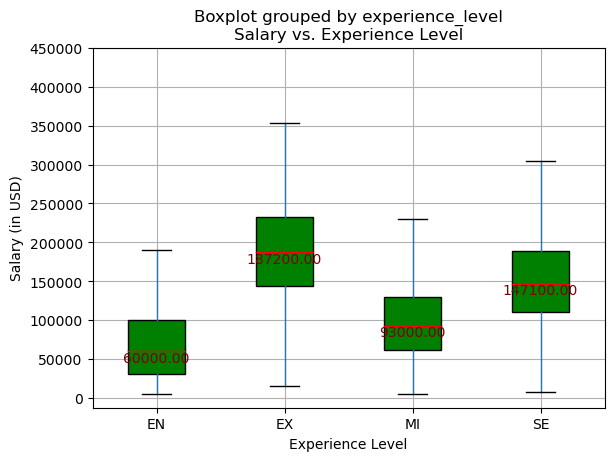

In [18]:
# Plotting Salary vs. Experience Level (with removed outliers in salary_in_usd)

a="blue"
b="red"
c="green"

# Calculate median values
medians = final_df_remove_outlier.groupby("experience_level")["salary_in_usd"].median()

#plotting the boxplot
final_df_remove_outlier.boxplot(column=["salary_in_usd"], by=["experience_level"], patch_artist=True, boxprops=dict(facecolor=c), flierprops=dict(color=a, markeredgecolor=a), medianprops=dict(color=b))

# Add median values as annotations
for i, med in enumerate(medians):
    plt.text(i + 1, med, f"{med:.2f}", ha="center", va="top", color="maroon")

plt.title('Salary vs. Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (in USD)')

y_ticks = np.arange(0, 500000, 50000)
plt.yticks(y_ticks)

plt.savefig("output_data_GC/Fig4_salary_experience_level_removed_outliers.png")
plt.show()

#There's a clear trend that as experience level increases, the median salary also increases. 
#The Executive-level (EX) experience has the highest median salary, followed by Entry-level(EN), Mid-level (MI), and Senior-level (SE). 
#The spread of salaries (as shown by the height of the boxes) also seems to increase with experience, indicating more variability in salaries for more experienced roles.

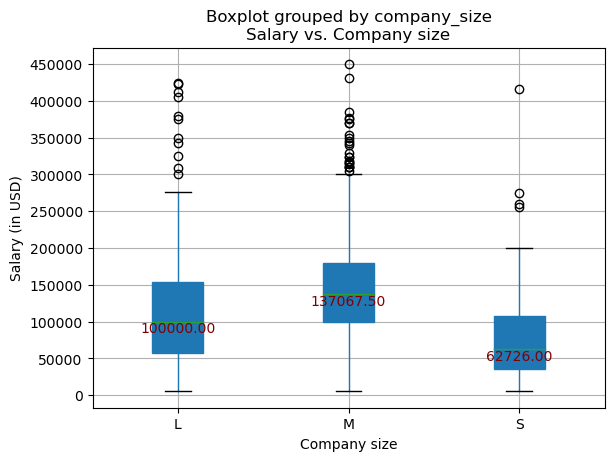

In [19]:
# Salary vs. Company_size plotting

# Calculate median values
medians = df_clean.groupby("company_size")["salary_in_usd"].median()

#boxplot
df_clean.boxplot(column=["salary_in_usd"], by=["company_size"], patch_artist=True)

# Add median values as annotations
for i, med in enumerate(medians):
    plt.text(i + 1, med, f"{med:.2f}", ha="center", va="top", color="maroon")
    
plt.title('Salary vs. Company size')
plt.xlabel('Company size')
plt.ylabel('Salary (in USD)')

y_ticks = np.arange(0, 500000, 50000)
plt.yticks(y_ticks)

plt.savefig("output_data_GC/Fig5_salary_company_size.png")
plt.show()

#There's a clear trend that the medium(M) size companies provide more median salaries followed by large(L) companies and then followed by small(S) companies. 
#The spread of salaries (as shown by the height of the boxes) is more for large size companies.

In [20]:
# Removing outliers in salary_in_usd for different sizes of Companies: Salary vs. Company size


df_remove_outlier_a=df_clean[(df_clean["salary_in_usd"]<300000)&(df_clean["company_size"]=="L")]
df_remove_outlier_b=df_clean[(df_clean["salary_in_usd"]<303000)&(df_clean["company_size"]=="M")]
df_remove_outlier_c=df_clean[(df_clean["salary_in_usd"]<175000)&(df_clean["company_size"]=="S")]

dataframes = [df_remove_outlier_a,df_remove_outlier_b, df_remove_outlier_c]
final_df_remove_outlier_d =pd.concat(dataframes)
final_df_remove_outlier_d


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
5,2023,SE,FT,Applied Scientist,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,US,0,US,L
13,2023,EN,FT,Applied Scientist,213660,US,0,US,L
14,2023,EN,FT,Applied Scientist,130760,US,0,US,L
...,...,...,...,...,...,...,...,...,...
3731,2020,MI,FT,Data Scientist,62726,FR,50,LU,S
3735,2021,EN,PT,AI Scientist,12000,BR,100,US,S
3744,2020,SE,FT,Machine Learning Engineer,45618,HR,100,HR,S
3745,2021,SE,FT,Director of Data Science,168000,JP,0,JP,S


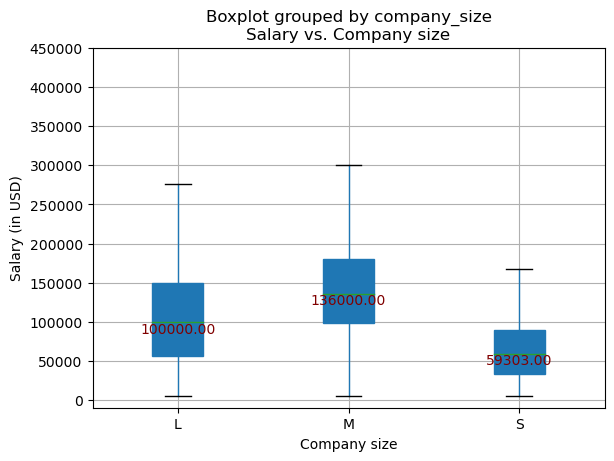

In [21]:
# Plotting Salary vs. Company size (with removed outliers in salary_in_usd)

# Calculate median values
medians = final_df_remove_outlier_d.groupby("company_size")["salary_in_usd"].median()

#boxplot
final_df_remove_outlier_d.boxplot(column=["salary_in_usd"], by=["company_size"], patch_artist=True)

# Add median values as annotations
for i, med in enumerate(medians):
    plt.text(i + 1, med, f"{med:.2f}", ha="center", va="top", color="maroon")
    
plt.title('Salary vs. Company size')
plt.xlabel('Company size')
plt.ylabel('Salary (in USD)')

y_ticks = np.arange(0, 500000, 50000)
plt.yticks(y_ticks)

plt.savefig("output_data_GC/Fig6_salary_company_size_removed_outliers.png")
plt.show()

#There's a clear trend that the medium size companies provide more median salaries followed by large companies and then followed by small companies. 
#The spread of salaries (as shown by the height of the boxes) is more for large size companies.

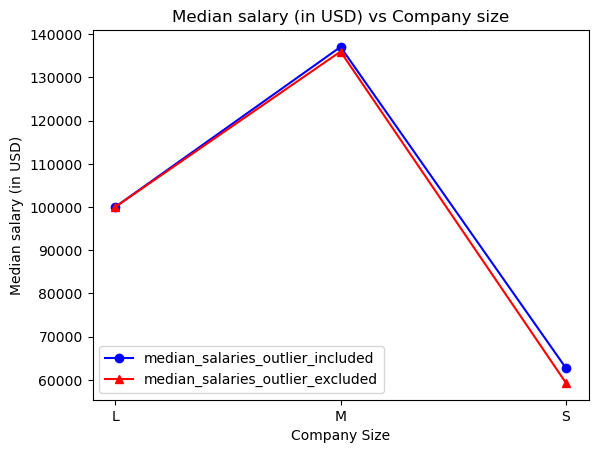

In [22]:
#plotting subplots for salary vs company size (with and without outliers)

company_sz=["L", "M", "S"]
median_salaries_outlier_included =[100000, 137067.5, 62726]
median_salaries_outlier_excluded =[100000, 136000, 59303]

# Plot the charts and apply some styling
median_salaries_outlier_included, = plt.plot(company_sz, median_salaries_outlier_included, marker ='o', color='blue', label="median_salaries_outlier_included")
median_salaries_outlier_excluded, = plt.plot(company_sz, median_salaries_outlier_excluded, marker ='^', color='red', label="median_salaries_outlier_excluded")

# Add labels to X and Y axes :: Add title
plt.title("Median salary (in USD) vs Company size")
plt.xlabel("Company Size")
plt.ylabel("Median salary (in USD)")

# Create a legend for the chart
plt.legend(loc="best")

plt.savefig("output_data_GC/Fig7_median_salary_vs_company_size.png")
plt.show()

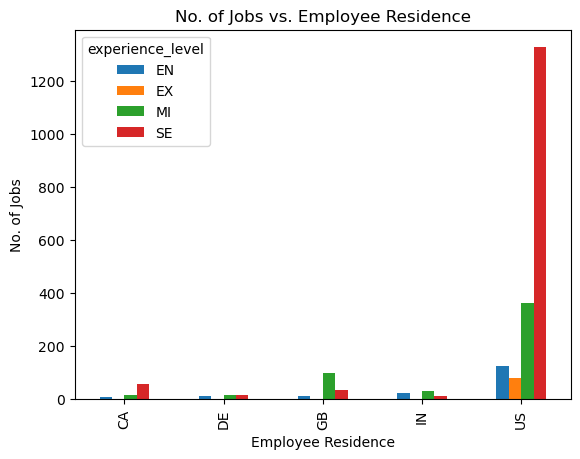

In [23]:
# Plotting Number of Jobs vs. Employee Residence and Experience Level (demonstrating for two categorical variables)

reduced_dataframe=df_clean.groupby(["employee_residence"]).experience_level.value_counts().reset_index(name="no_of_jobs")
largest_five_residence_series=reduced_dataframe.groupby(["employee_residence"])["no_of_jobs"].sum().nlargest(5)
making_dataframe=largest_five_residence_series.to_frame().reset_index()

final_dataframe_largefive_residence = reduced_dataframe[reduced_dataframe["employee_residence"].isin(making_dataframe["employee_residence"])]

pivot_dataframe_plotting=final_dataframe_largefive_residence.pivot(index="employee_residence", columns ="experience_level", values= "no_of_jobs")
pivot_dataframe_plotting.plot(kind="bar")
plt.title('No. of Jobs vs. Employee Residence')
plt.xlabel('Employee Residence')
plt.ylabel('No. of Jobs')
plt.savefig("output_data_GC/Fig8_jobs_employee_residence_experience_level.png")
plt.show()

# This plot shows the distribution of experience levels (Executive-level (EX), Entry-level(EN), Mid-level (MI), Senior-level (SE)) in the top 5 (based on the number of jobs) employee residences. 
#For the employees who reside in US, majority of them fall under the category of senior-level (SE) experience followed by middle-level (MI) experience.

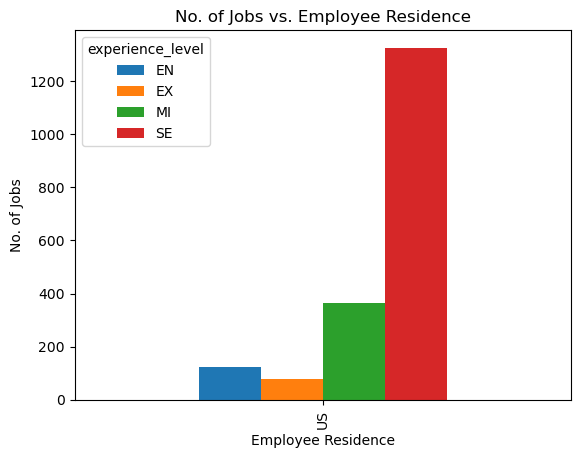

In [24]:
# Plotting Number of Jobs vs. Employee Residence and Experience Level (for US employee residents only)

reduced_dataframe=df_clean.groupby(["employee_residence"]).experience_level.value_counts().reset_index(name="no_of_jobs")
largest_five_residence_series=reduced_dataframe.groupby(["employee_residence"])["no_of_jobs"].sum().nlargest(1)
making_dataframe=largest_five_residence_series.to_frame().reset_index()

final_dataframe_largefive_residence = reduced_dataframe[reduced_dataframe["employee_residence"].isin(making_dataframe["employee_residence"])]

pivot_dataframe_plotting=final_dataframe_largefive_residence.pivot(index="employee_residence", columns ="experience_level", values= "no_of_jobs")
pivot_dataframe_plotting.plot(kind="bar")
plt.title('No. of Jobs vs. Employee Residence')
plt.xlabel('Employee Residence')
plt.ylabel('No. of Jobs')
plt.savefig("output_data_GC/Fig9_jobs_employee_residence_experience_level_US_only.png")
plt.show()

# This plot shows the distribution of experience levels (Executive-level (EX), Entry-level(EN), Mid-level (MI), Senior-level (SE)) in US region based on number of jobs. 
#In US, highest number of jobs(73.25% of total jobs) have employed people with Senior-level (SE) type of experience followed by middle-level (MI) experience.

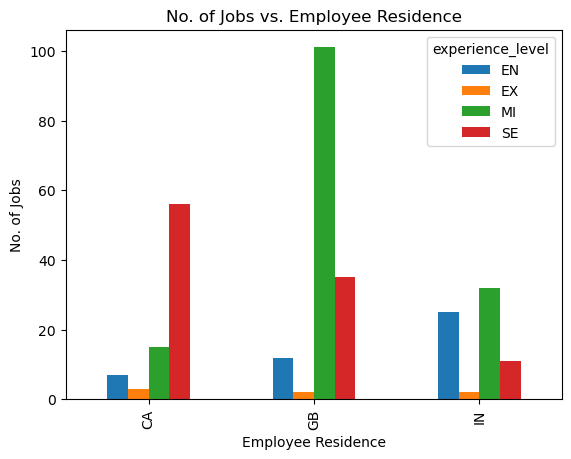

In [25]:
# Plotting Number of Jobs vs. Employee Residence and Experience Level (excluding US employee residents)

df_clean_excluded_US=df_clean.loc[df_clean["employee_residence"]!= "US",:]
reduced_dataframe=df_clean_excluded_US.groupby(["employee_residence"]).experience_level.value_counts().reset_index(name="no_of_jobs")
largest_five_residence_series=reduced_dataframe.groupby(["employee_residence"])["no_of_jobs"].sum().nlargest(3)
making_dataframe=largest_five_residence_series.to_frame().reset_index()

final_dataframe_largefive_residence = reduced_dataframe[reduced_dataframe["employee_residence"].isin(making_dataframe["employee_residence"])]

pivot_dataframe_plotting=final_dataframe_largefive_residence.pivot(index="employee_residence", columns ="experience_level", values= "no_of_jobs")
pivot_dataframe_plotting.plot(kind="bar")
plt.title('No. of Jobs vs. Employee Residence')
plt.xlabel('Employee Residence')
plt.ylabel('No. of Jobs')
plt.savefig("output_data_GC/Fig10_jobs_employee_residence_experience_level_after_US.png")
plt.show()

# This plot shows the distribution of experience levels (Executive-level (EX), Entry-level(EN), Mid-level (MI), Senior-level (SE)) in next top 3 employee residence countries after US.
#After US, the next top 3 employee residence countries (CA, GB, IN) contributes to 11.64% employment of the total jobs.

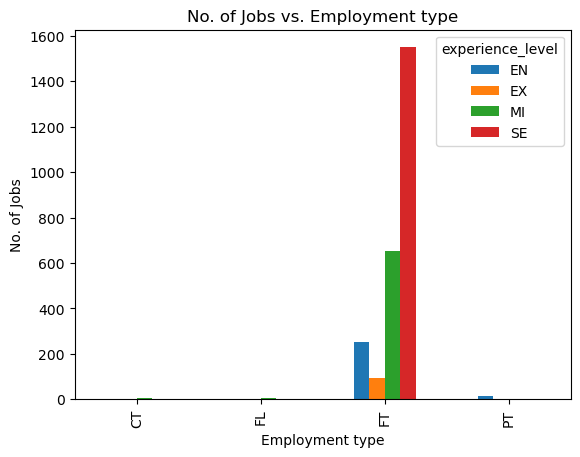

In [26]:
# Plotting Number of Jobs vs. Employment types and Experience Level (demonstrating for two categorical variables)

reduced_dataframe=df_clean.groupby(["employment_type"]).experience_level.value_counts().reset_index(name="no_of_jobs")
employment_types_series=reduced_dataframe.groupby(["employment_type"])["no_of_jobs"].sum()
making_dataframe=employment_types_series.to_frame().reset_index()

final_dataframe_employment_types = reduced_dataframe[reduced_dataframe["employment_type"].isin(making_dataframe["employment_type"])]
pivot_dataframe_plotting=final_dataframe_employment_types.pivot(index="employment_type", columns ="experience_level", values= "no_of_jobs")
pivot_dataframe_plotting.plot(kind="bar")
plt.title('No. of Jobs vs. Employment type')
plt.xlabel('Employment type')
plt.ylabel('No. of Jobs')
plt.savefig("output_data_GC/Fig11_jobs_employment_type_experience_level.png")
plt.show()

#This plot shows the distribution of different experience levels (Executive-level (EX), Entry-level(EN), Mid-level (MI), Senior-level (SE)) 
# jobs among FT(Full Time) employees since rest of emloyment types (1.43%) have negligible number of jobs.


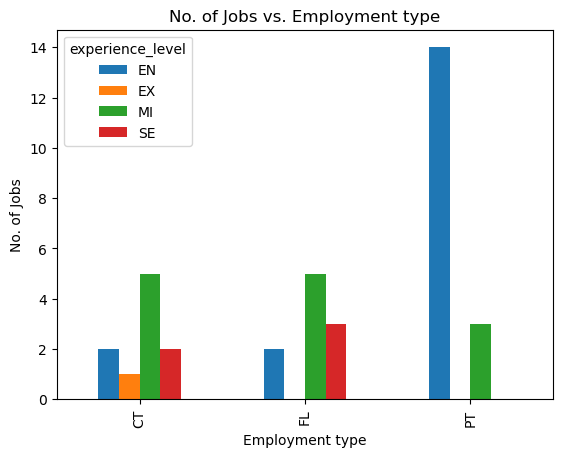

In [27]:
# Plotting Number of Jobs vs. Employment types and Experience Level (excluding FT employees)

df_clean_excluded_FT=df_clean.loc[df_clean["employment_type"]!= "FT",:]
reduced_dataframe=df_clean_excluded_FT.groupby(["employment_type"]).experience_level.value_counts().reset_index(name="no_of_jobs")
employment_types_series=reduced_dataframe.groupby(["employment_type"])["no_of_jobs"].sum()
making_dataframe=employment_types_series.to_frame().reset_index()

final_dataframe_employment_types = reduced_dataframe[reduced_dataframe["employment_type"].isin(making_dataframe["employment_type"])]
pivot_dataframe_plotting=final_dataframe_employment_types.pivot(index="employment_type", columns ="experience_level", values= "no_of_jobs")
pivot_dataframe_plotting.plot(kind="bar")
plt.title('No. of Jobs vs. Employment type')
plt.xlabel('Employment type')
plt.ylabel('No. of Jobs')
plt.savefig("output_data_GC/Fig12_jobs_employment_type_experience_level_except_FT.png")
plt.show()

#This plot shows the distribution of different experience levels (Executive-level (EX), Entry-level(EN), Mid-level (MI), Senior-level (SE)) 
# jobs except FT(Full Time) employees since demonstrating negligible(1.43%) number of jobs.


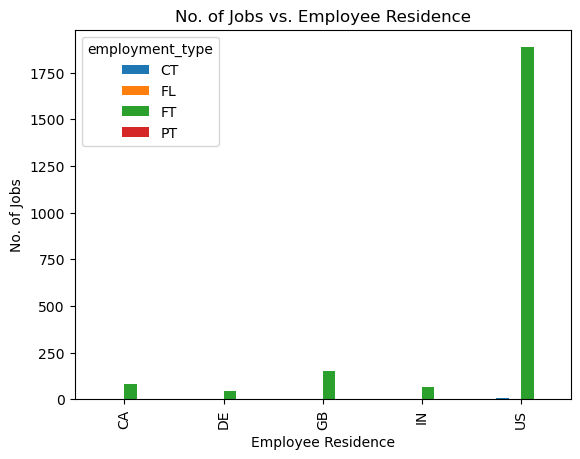

In [28]:
# Plotting Number of Jobs vs. Employment types and Employee residence (demonstrating for two categorical variables)

reduced_dataframe=df_clean.groupby(["employee_residence"]).employment_type.value_counts().reset_index(name="no_of_jobs")
largest_five_residence_series=reduced_dataframe.groupby(["employee_residence"])["no_of_jobs"].sum().nlargest(5)
making_dataframe=largest_five_residence_series.to_frame().reset_index()

final_dataframe_largefive_residence = reduced_dataframe[reduced_dataframe["employee_residence"].isin(making_dataframe["employee_residence"])]

pivot_dataframe_plotting=final_dataframe_largefive_residence.pivot(index="employee_residence", columns ="employment_type", values= "no_of_jobs")
pivot_dataframe_plotting.plot(kind="bar")
plt.title('No. of Jobs vs. Employee Residence')
plt.xlabel('Employee Residence')
plt.ylabel('No. of Jobs')
plt.savefig("output_data_GC/Fig13_jobs_employee_residence_employment_type.png")
plt.show()

# This plot shows the distribution of employment types Full Time(FT), Contract Type(CT), Freelance(FL), Part Time (PT) in the top 5 (based on the number of jobs) employee residences. 
#For all employee residences, majority of the jobs fall under the category of Full Time(FT), highest being in US.

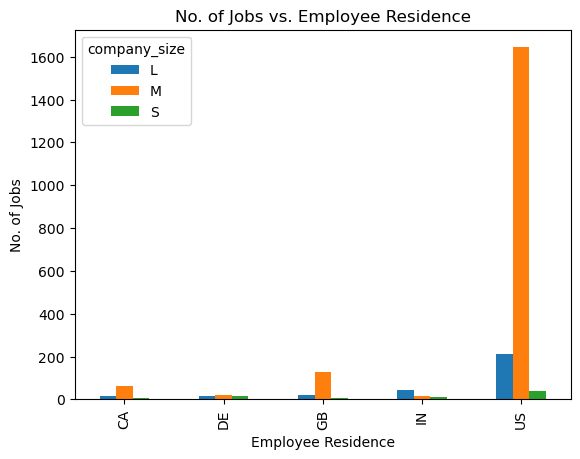

In [29]:
# Plotting Number of Jobs vs. Employee residence and Company size (demonstrating for two categorical variables)

reduced_dataframe=df_clean.groupby(["employee_residence"]).company_size.value_counts().reset_index(name="no_of_jobs")
largest_five_residence_series=reduced_dataframe.groupby(["employee_residence"])["no_of_jobs"].sum().nlargest(5)
making_dataframe=largest_five_residence_series.to_frame().reset_index()

final_dataframe_largefive_residence = reduced_dataframe[reduced_dataframe["employee_residence"].isin(making_dataframe["employee_residence"])]

pivot_dataframe_plotting=final_dataframe_largefive_residence.pivot(index="employee_residence", columns ="company_size", values= "no_of_jobs")
pivot_dataframe_plotting.plot(kind="bar")
plt.title('No. of Jobs vs. Employee Residence')
plt.xlabel('Employee Residence')
plt.ylabel('No. of Jobs')
plt.savefig("output_data_GC/Fig14_jobs_employee_residence_company_size.png")
plt.show()

# This plot shows the distribution of company sizes Large(L), Medium(M), Small(S) in the top 5 (based on the number of jobs) employee residences. 
#For all employee residences, majority of the jobs are employed by medium(M) size companies.

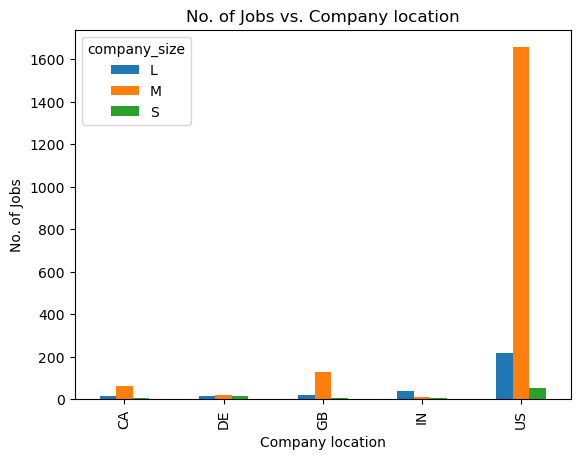

In [30]:
# Plotting Number of Jobs vs. Company location and Company size (demonstrating for two categorical variables)

reduced_dataframe=df_clean.groupby(["company_location"]).company_size.value_counts().reset_index(name="no_of_jobs")
largest_five_company_location_series=reduced_dataframe.groupby(["company_location"])["no_of_jobs"].sum().nlargest(5)
making_dataframe=largest_five_company_location_series.to_frame().reset_index()

final_dataframe_largefive_residence = reduced_dataframe[reduced_dataframe["company_location"].isin(making_dataframe["company_location"])]

pivot_dataframe_plotting=final_dataframe_largefive_residence.pivot(index="company_location", columns ="company_size", values= "no_of_jobs")
pivot_dataframe_plotting.plot(kind="bar")
plt.title('No. of Jobs vs. Company location')
plt.xlabel('Company location')
plt.ylabel('No. of Jobs')
plt.savefig("output_data_GC/Fig15_jobs_company_location_company_size.png")
plt.show()

# This plot shows the distribution of company sizes Large(L), Medium(M), Small(S) in the top 5 (based on the number of jobs) company locations. 
#For all company locations, majority of the jobs are employed by medium(M) size companies.

/var/folders/m8/djwm7c7s5t93w9z1ncqx7jsh0000gn/T/ipykernel_12223/2222869105.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(remote_ratio_median_salary["remote_ratio_label"])


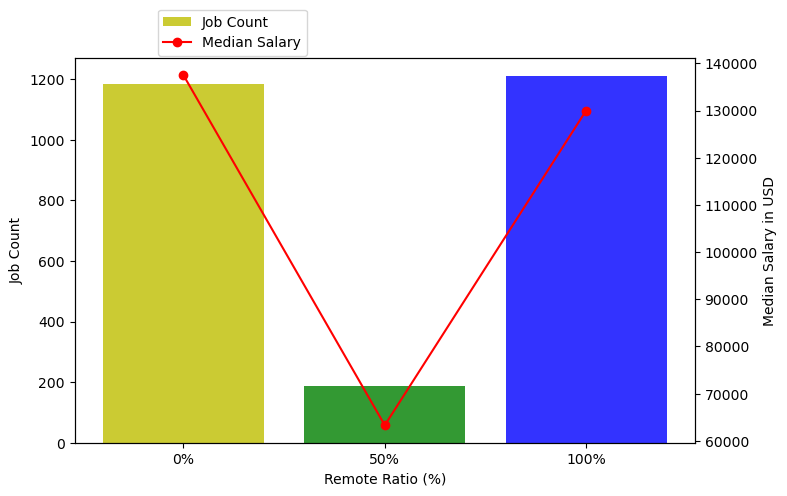

In [31]:
#Demonstarting multivariate analysis (Median Salary vs Remote work ratio vs job count)

#calculating median salaries for remote ratio categories
remote_ratio_median_salary= df_clean.groupby("remote_ratio")["salary_in_usd"].median().reset_index()
remote_ratio_median_salary= round(remote_ratio_median_salary,2)

#remote ratio job counts column creation and addition to the dataframe 
job_count=[1186, 187, 1211]
rr_label =["0%", "50%", "100%"]
remote_ratio_median_salary["job_count"]= job_count
remote_ratio_median_salary["remote_ratio_label"]=rr_label

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(8, 5))
colors = ["y", "g", "b"]

# Bar plot for job count with specified colors
ax1.bar(remote_ratio_median_salary["remote_ratio_label"], remote_ratio_median_salary["job_count"], alpha=0.8, color=colors, label="Job Count")
ax1.set_xlabel('Remote Ratio (%)')
ax1.set_ylabel('Job Count')
ax1.tick_params(axis ='x')
ax1.set_xticklabels(remote_ratio_median_salary["remote_ratio_label"])

# Create a second y-axis for Median salary
ax2 = ax1.twinx()
ax2.plot(remote_ratio_median_salary["remote_ratio_label"], remote_ratio_median_salary["salary_in_usd"], color='r', marker='o', label='Median Salary')
ax2.set_ylabel('Median Salary in USD')
ax2.tick_params(axis='y')

# Add legend
fig.legend(loc="upper left", bbox_to_anchor=(0.22, 0.99))

#plot saved
plt.savefig("output_data_GC/Fig16_jobs_remote_ratio_median_salary.png")
plt.show()



# Sahil Wadhwa

1. Work_Year Analysis (Univariate)
2. Company_size vs Remote_Ratio
3. Job Title  vs Experience Level 
4. Company Location vs Salary

In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import zipfile
from operator import add
import scipy.stats
from scipy.stats import chi2

In [2]:
#Read in CSV
salary = "./ds_salaries.csv"
df = pd.read_csv(salary)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
#Finding and dropping duplicate rows
duplicates = df[df.duplicated()]
df = df.drop_duplicates()
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
#Count of unique values
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [5]:
#Null Values
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
#Shape of Dataframe (Rows, Columns)
shape = df.shape
shape

(2584, 11)

In [7]:
#Info about the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
work_year             2584 non-null int64
experience_level      2584 non-null object
employment_type       2584 non-null object
job_title             2584 non-null object
salary                2584 non-null int64
salary_currency       2584 non-null object
salary_in_usd         2584 non-null int64
employee_residence    2584 non-null object
remote_ratio          2584 non-null int64
company_location      2584 non-null object
company_size          2584 non-null object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


In [8]:
#Summary Statistics of the Dataframe
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,2584.000000,2.584000e+03,2584.000000,2584.000000
mean,2022.301084,2.103653e+05,133409.280186,50.483746
std,0.749179,8.080375e+05,67136.837329,48.163707
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,9.000000e+04,84975.000000,0.000000
50%,2022.000000,1.346300e+05,130000.000000,50.000000
75%,2023.000000,1.825625e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [9]:
wy = df["experience_level"].value_counts()
wy

SE    1554
MI     664
EN     270
EX      96
Name: experience_level, dtype: int64

In [10]:
#Work_Year Counts
wy = df["work_year"].value_counts()
wy

2023    1156
2022    1125
2021     228
2020      75
Name: work_year, dtype: int64

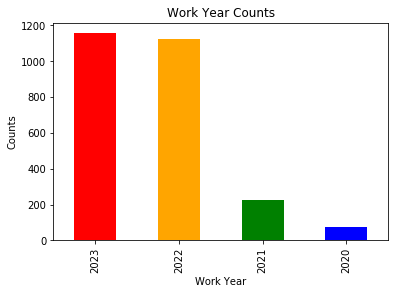

In [12]:
#Plotting Work Year (Univariate Plot)
fig, ax = plt.subplots()
color = ["red", "orange", "green", "blue"]
bars = wy.plot(kind="bar", title = "Work Year Counts", color = color)
ax.set_xlabel('Work Year')
ax.set_ylabel('Counts')
plt.savefig('output_data/Fig1.png')
plt.show()

## Univaraite Analysis

1. Work_Year: 2023 has the most amount of inputs while 2020 has the least amount of inputs

## 2. Company_size vs Remote_Ratio

In [13]:
##Company Size Data Based on Remote_Ratio
cs = df.groupby("company_size")["remote_ratio"].mean().reset_index()
cs = round(cs,2)
cs  

,company_size,remote_ratio
0,L,63.57
1,M,46.23
2,S,72.79


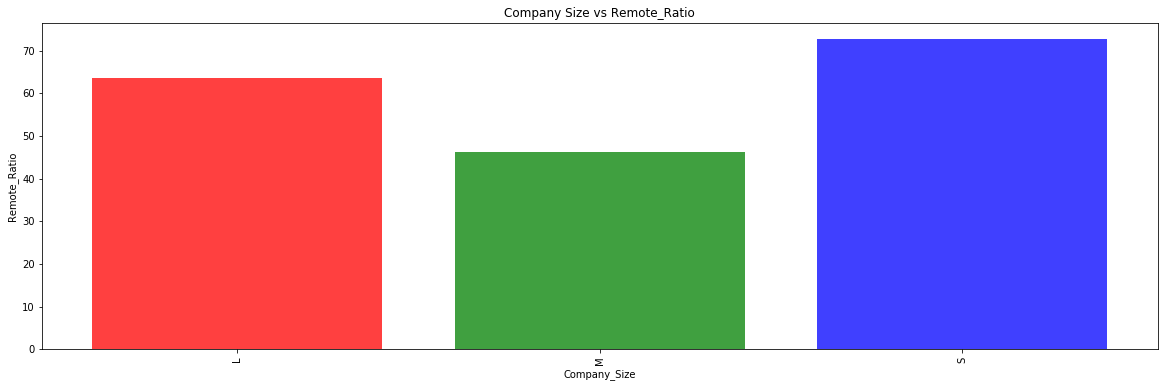

In [14]:
#Plotting Company_size vs Remote_Ratio
fig = plt.figure(figsize = (20,6))
color = ["red", "green", "blue"]
plt.bar(cs["company_size"], cs["remote_ratio"], color = color, alpha = 0.75)
plt.xlabel("Company_Size")
plt.ylabel("Remote_Ratio")
plt.title("Company Size vs Remote_Ratio")
plt.xticks(rotation = 90)
plt.savefig('output_data/Fig2.png')
plt.show()

## 3. Job Title  vs Experience Level 

In [15]:
##Company Location Grouped Data Based on Salary
exp_level = df.groupby(['job_title','experience_level']).size().reset_index(name='count')
exp_level = round(exp_level,2)
exp_level.head()

,job_title,experience_level,count
0,3D Computer Vision Researcher,EN,2
1,3D Computer Vision Researcher,MI,1
2,3D Computer Vision Researcher,SE,1
3,AI Developer,EN,6
4,AI Developer,MI,2


In [16]:
SE_lis = []
MI_lis = []
EN_lis = []
EX_lis = []
SE = 0
MI = 0
EN = 0
EX = 0
set_var = exp_level['job_title'][0]
for i in range(len(exp_level)):
    job_setter = exp_level['job_title'][i]
    if(job_setter != set_var):
        SE_lis.append(SE)
        MI_lis.append(MI)
        EN_lis.append(EN)
        EX_lis.append(EX)
        set_var = job_setter
        SE = 0
        MI = 0
        EN = 0 
        EX = 0
    exp_setter = exp_level['experience_level'][i]
    if(exp_setter == 'SE'):
        SE += exp_level['count'][i]
    elif(exp_setter == 'MI'):
        MI += exp_level['count'][i]
    elif(exp_setter == 'EN'):
        EN += exp_level['count'][i]
    elif(exp_setter == 'EX'):
        EX += exp_level['count'][i]
SE_lis.append(SE)
MI_lis.append(MI)
EN_lis.append(EN)
EX_lis.append(EX)

In [17]:
SE_MI = list(map(add, SE_lis, MI_lis))
SE_MI_EN = list(map(add, SE_MI, EN_lis))

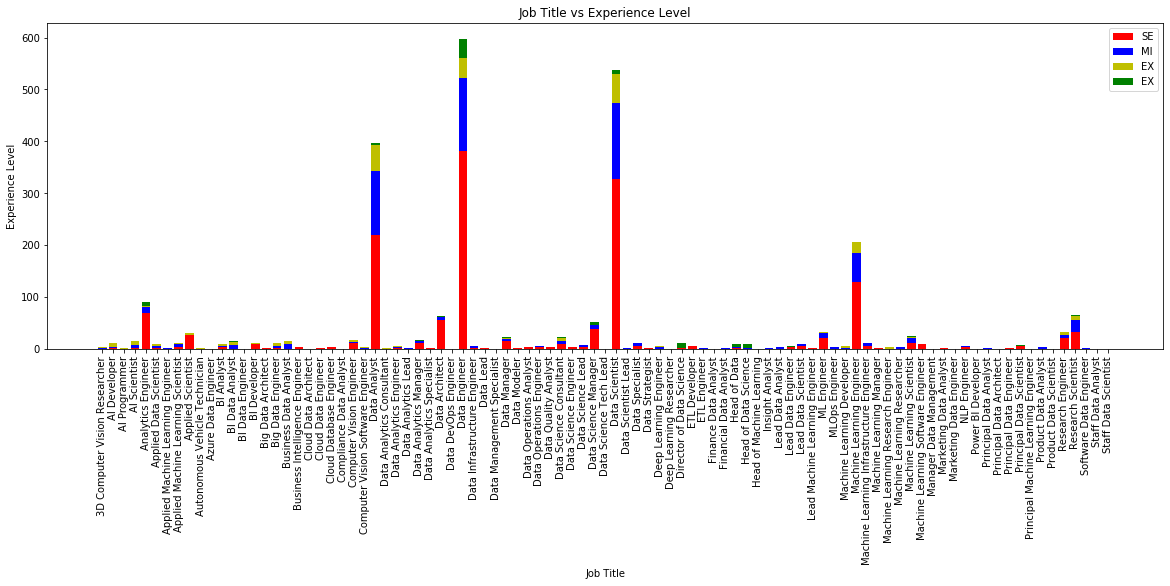

In [19]:
x = exp_level['job_title'].unique()
fig = plt.figure(figsize = (20,6))
plt.bar(x, SE_lis, color='r')
plt.bar(x, MI_lis, bottom = SE_lis, color = 'b')
plt.bar(x, EN_lis, bottom = SE_MI, color = 'y')
plt.bar(x, EX_lis, bottom = SE_MI_EN, color = 'g')
plt.xlabel("Job Title")
plt.ylabel("Experience Level")
plt.legend(["SE", "MI", "EX", "EX"])
plt.title("Job Title vs Experience Level")
plt.xticks(rotation=90)
plt.savefig('output_data/Fig3.png')
plt.show()

## Chi-Square Test of Independence

Null Hypothesis: The two variables, job title and experience level are dependant on each other


Alternate Hypothesis: The two variables, job title and experience level are independent of each other

In [20]:
ct_table_ind=pd.crosstab(df["job_title"], df["experience_level"])
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind)
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")

chi2 statistic:     980.44
p-value:            1.3329e-79
degrees of freedom: 276


## 4. Company Location vs Salary

In [21]:
comp_loc = df.groupby("company_location")["salary_in_usd"].mean().reset_index()
comp_loc = round(comp_loc,2)
comp_loc

,company_location,salary_in_usd
0,AE,100000.00
1,AL,10000.00
2,AM,50000.00
3,AR,25000.00
4,AS,29351.00
...,...,...
67,TH,23064.33
68,TR,19058.00
69,UA,57850.00
70,US,152374.79


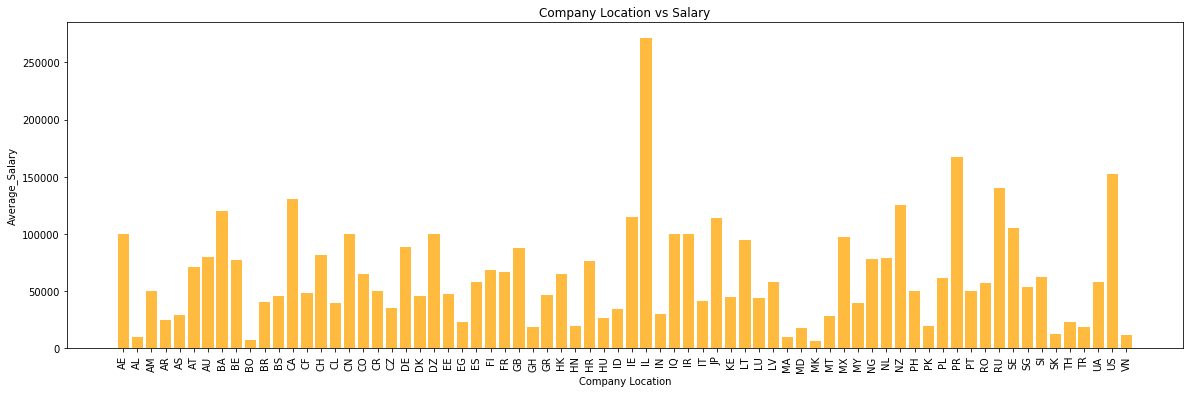

In [22]:
fig = plt.figure(figsize = (20,6))
plt.bar(comp_loc["company_location"], comp_loc["salary_in_usd"],color = 'orange',alpha=0.75)
plt.xlabel("Company Location")
plt.ylabel("Average_Salary")
plt.title("Company Location vs Salary")
plt.xticks(rotation=90)
plt.savefig('output_data/Fig4.png')
plt.show()

## Top 10 and Bottom 10 Salaries Based On Company Location

In [23]:
top_ten_salaries = comp_loc.nlargest(10, "salary_in_usd").reset_index()
top_ten_salaries

,index,company_location,salary_in_usd
0,37,IL,271446.50
1,59,PR,167500.00
2,70,US,152374.79
3,62,RU,140333.33
4,12,CA,130572.76
5,55,NZ,125000.00
6,7,BA,120000.00
7,36,IE,114943.43
8,42,JP,114127.33
9,63,SE,105000.00


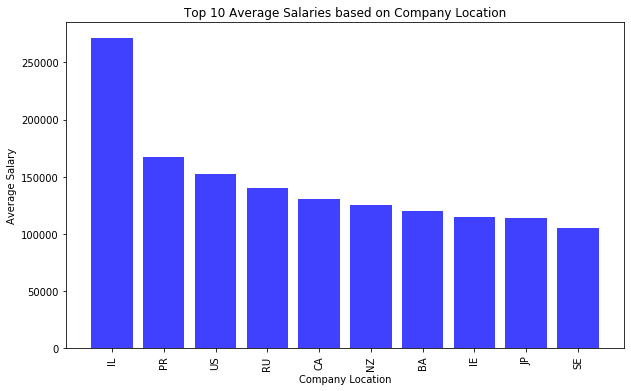

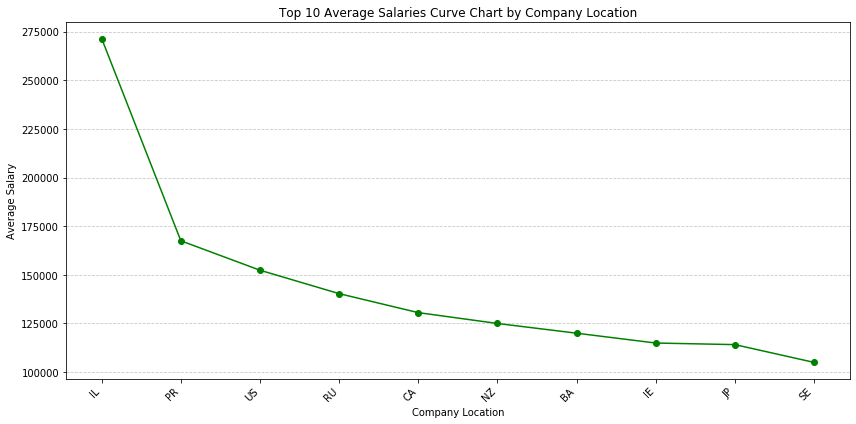

In [24]:
#Bar Chart for Top 10 Avg. Salaries Based on Company Location
fig = plt.figure(figsize = (10,6))
plt.bar(top_ten_salaries["company_location"], top_ten_salaries["salary_in_usd"],color ='blue',alpha=0.75)
plt.xlabel("Company Location")
plt.ylabel("Average Salary")
plt.title("Top 10 Average Salaries based on Company Location")
plt.xticks(rotation=90)
plt.savefig('output_data/Fig5.png')
plt.show()

#Curve Chart for Top 10 Avg. Salaries Based on Company Location
plt.figure(figsize=(12, 6))
plt.plot(top_ten_salaries["company_location"], top_ten_salaries["salary_in_usd"], marker='o', linestyle='-', color='g')
plt.xlabel("Company Location")
plt.ylabel("Average Salary")
plt.title("Top 10 Average Salaries Curve Chart by Company Location")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Ensure labels are not cut off
plt.savefig('output_data/Fig6.png')
plt.show()

## Top 10 Salaries

1. IL
2. PR
3. US
4. RU
5. CA
6. NZ
7. BA
8. IE
9. JP
10. SE

In [25]:
bottom_ten_salaries = comp_loc.nsmallest(10, "salary_in_usd").reset_index()
bottom_ten_salaries

,index,company_location,salary_in_usd
0,49,MK,6304.0
1,9,BO,7500.0
2,1,AL,10000.0
3,47,MA,10000.0
4,71,VN,12000.0
5,66,SK,12608.0
6,48,MD,18000.0
7,29,GH,18500.0
8,68,TR,19058.0
9,32,HN,20000.0


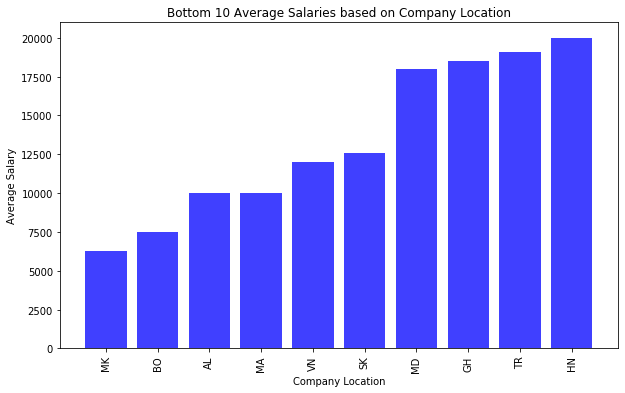

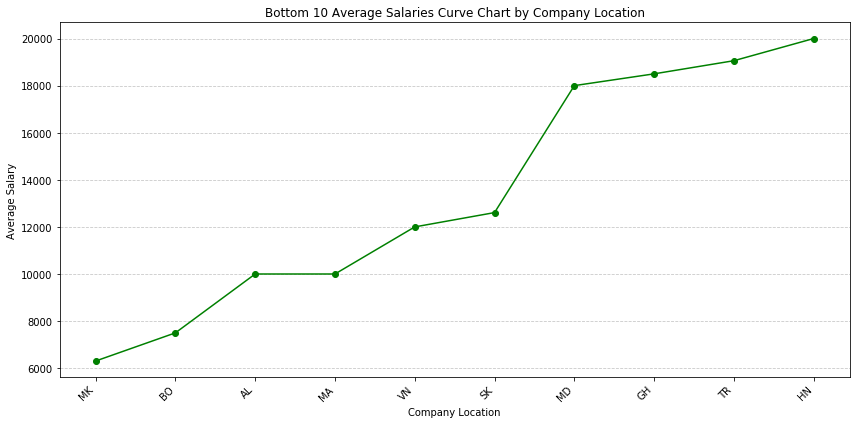

In [26]:
#Bar Chart for Bottom 10 Avg. Salaries Based on Company Location
fig = plt.figure(figsize = (10,6))
plt.bar(bottom_ten_salaries["company_location"], bottom_ten_salaries["salary_in_usd"],color ='blue',alpha=0.75)
plt.xlabel("Company Location")
plt.ylabel("Average Salary")
plt.title("Bottom 10 Average Salaries based on Company Location")
plt.xticks(rotation=90)
plt.savefig('output_data/Fig7.png')
plt.show()

#Curve Chart for Bottom 10 Avg. Salaries Based on Company Location
plt.figure(figsize=(12, 6))
plt.plot(bottom_ten_salaries["company_location"], bottom_ten_salaries["salary_in_usd"], marker='o', linestyle='-', color='g')
plt.xlabel("Company Location")
plt.ylabel("Average Salary")
plt.title("Bottom 10 Average Salaries Curve Chart by Company Location")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Ensure labels are not cut off
plt.savefig('output_data/Fig8.png')
plt.show()

## Bottom 10 Salaries

1. MK
2. BO
3. AL
4. MA
5. VN
6. SK
7. MD
8. GH
9. TR
10. HN

## Bivariate Analysis

1. Company_size vs Remote_Ratio: The company size with the highest remote ratio is smaller level companies, then larger level companies and then medium level companies

2. Experience level vs Job Title: Because our chi-square of independence test has a p-value less than 0,05, we reject our null hypothesis which means that job title and experience level are independent of each other

3. Company Location vs Salary: There is a large salary variation when we study the average salaries based on company location. The top 3 average salaries belong to company locations in IL, PR and US. The bottom 3 average salaries belong to company locations in MK, BO, AL

# Nameeta Tiwari

Experience Level Analysis (Univariate)
Employee Residence Analysis (Univariate)
Salary vs Employment Type (Bivariate)
Experience vs Remote Ratio (Bivariate)



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import statistics as stat

In [2]:
salary = "./ds_salaries.csv"
salary_df=pd.read_csv(salary)
salary_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
#Counting Rows and Columns in dataset
Rows = len(salary_df.axes[0])
Columns = len(salary_df.axes[1])

print(f"Total Rows : {Rows},  Total Columns : {Columns}")

Total Rows : 3755,  Total Columns : 11


In [4]:
Summary_df = salary_df.info()
Summary_df
salary_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [6]:
#Checking for Null/Empty values in the dataset
no_entry_cell = salary_df.isnull().sum()
no_entry_cell

#No empty cell was found in the dataset 

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
#Find duplicate rows
duplicate_rows = salary_df[salary_df.duplicated()]
#Remove duplicate rows
salary_df = salary_df.drop_duplicates()
salary_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [8]:
#Value counting for each columns for unique entries
value_counts = {column: salary_df[column].value_counts() for column in salary_df.columns}
value_counts

{'work_year': work_year
 2023    1156
 2022    1125
 2021     228
 2020      75
 Name: count, dtype: int64,
 'experience_level': experience_level
 SE    1554
 MI     664
 EN     270
 EX      96
 Name: count, dtype: int64,
 'employment_type': employment_type
 FT    2547
 PT      17
 CT      10
 FL      10
 Name: count, dtype: int64,
 'job_title': job_title
 Data Engineer                598
 Data Scientist               538
 Data Analyst                 396
 Machine Learning Engineer    206
 Analytics Engineer            91
                             ... 
 Compliance Data Analyst        1
 Deep Learning Researcher       1
 Staff Data Analyst             1
 Data DevOps Engineer           1
 Finance Data Analyst           1
 Name: count, Length: 93, dtype: int64,
 'salary': salary
 100000    70
 120000    59
 150000    58
 200000    48
 80000     46
           ..
 126277     1
 153088     1
 323300     1
 200160     1
 412000     1
 Name: count, Length: 815, dtype: int64,
 'salary_curren

In [9]:
#Creating and replacing  dictionary for Experience column
Exp_Dictionary={
    "SE": "Senior Level",
    "MI": "Medium Level",
    "EN": "Entry Level",
    "EX": "Executive Level"
}
salary_df["experience_level"]=salary_df["experience_level"].replace(Exp_Dictionary)
salary_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior Level,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,Medium Level,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,Medium Level,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,Senior Level,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,Senior Level,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior Level,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,Medium Level,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,Entry Level,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,Entry Level,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [10]:
#Categorical Analysis of Experience Level

Total_Exp_Count=salary_df["experience_level"].value_counts()
Total_Exp_Count

experience_level
Senior Level       1554
Medium Level        664
Entry Level         270
Executive Level      96
Name: count, dtype: int64

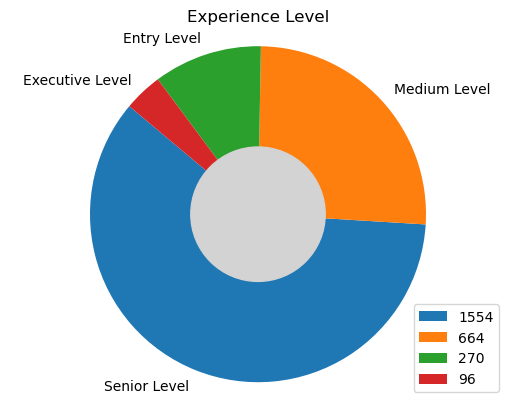

In [11]:
import matplotlib.pyplot as plt
labels = ["Senior Level", "Medium Level", "Entry Level", "Executive Level"]
sizes=[1554, 664, 270, 96]
fig, dounut_shape=plt.subplots()
dounut_shape.pie(sizes, startangle=140, labels=labels)
circle=plt.Circle((0,0), 0.4, color ="lightgrey")
dounut_shape.add_artist(circle)
dounut_shape.axis("equal")
plt.title("Experience Level")
plt.legend(sizes, loc="lower right")
plt.savefig("output_data_NT/Fig1_distribution_Experience_level.png")
plt.show()

In [12]:
#Experience Level Percentage
Perc_Explevel = Total_Exp_Count * 100 /salary_df["experience_level"].count()
Perc_Explevel=round(Perc_Explevel, 2)
Perc_Explevel

experience_level
Senior Level       60.14
Medium Level       25.70
Entry Level        10.45
Executive Level     3.72
Name: count, dtype: float64

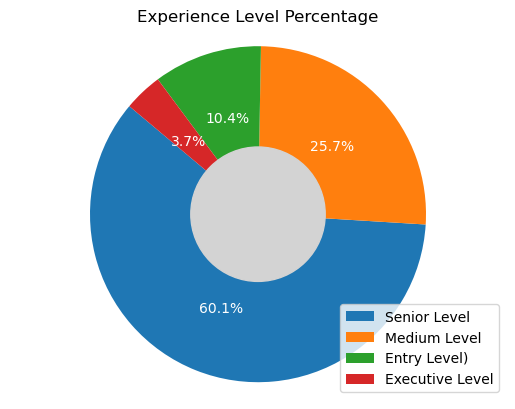

In [13]:
labels = ["Senior Level", "Medium Level", "Entry Level)", "Executive Level"]
sizes=[60.14, 25.70, 10.45, 3.72]
fig, dounut_shape=plt.subplots()
dounut_shape.pie(sizes, startangle=140, labels=labels, autopct="%1.1f%%", textprops={"color":"white"})
circle=plt.Circle((0,0), 0.4, color ="lightgrey")
dounut_shape.add_artist(circle)
dounut_shape.axis("equal")
plt.title("Experience Level Percentage")
plt.legend(labels, loc="lower right")
plt.savefig("output_data_NT/Fig2_distribution_Percent_Experience_level.png")
plt.show()

employee_residence
US    1893
GB     150
CA      81
IN      70
ES      47
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: count, Length: 78, dtype: int64


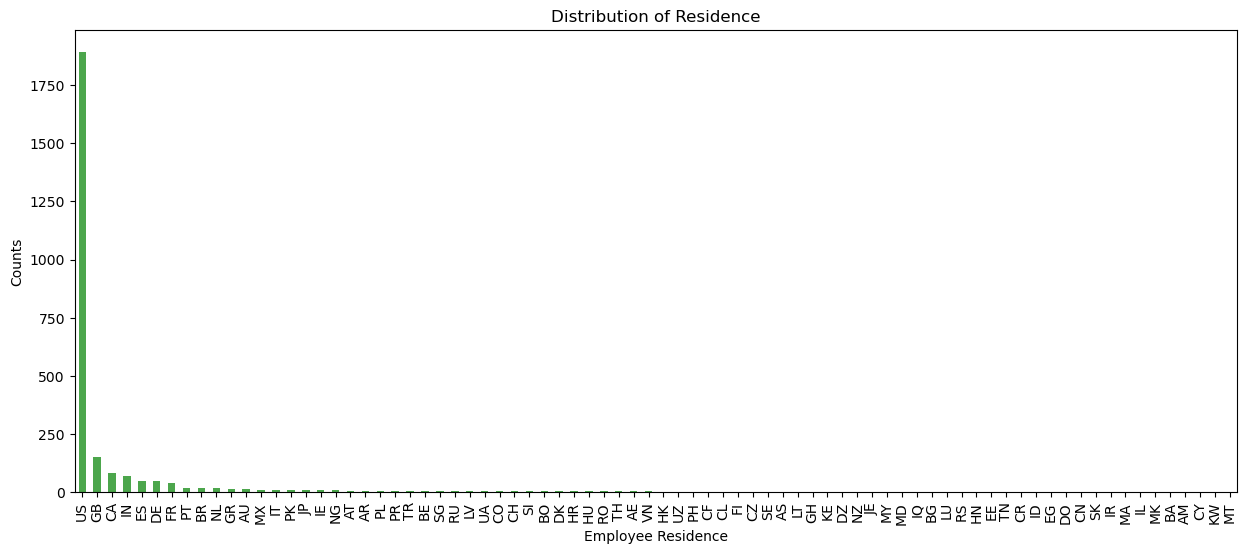

In [14]:
#plot bar chart for Residence of Employee
Emp_Residence =salary_df["employee_residence"].value_counts()
print(Emp_Residence)
fig = plt.figure(figsize = (15,6))
Emp_Residence.plot(kind="bar", color="green", alpha=0.7)

plt.xlabel("Employee Residence")
plt.ylabel("Counts")
plt.title("Distribution of Residence")
plt.xticks(rotation=90)
plt.savefig("output_data_NT/Fig3_distribution_Employee_Residence.png")
plt.show()

In [16]:
Top10_Resi=salary_df["employee_residence"].value_counts().head(10)
Top10_Resi

employee_residence
US    1893
GB     150
CA      81
IN      70
ES      47
DE      47
FR      37
PT      18
BR      18
NL      15
Name: count, dtype: int64

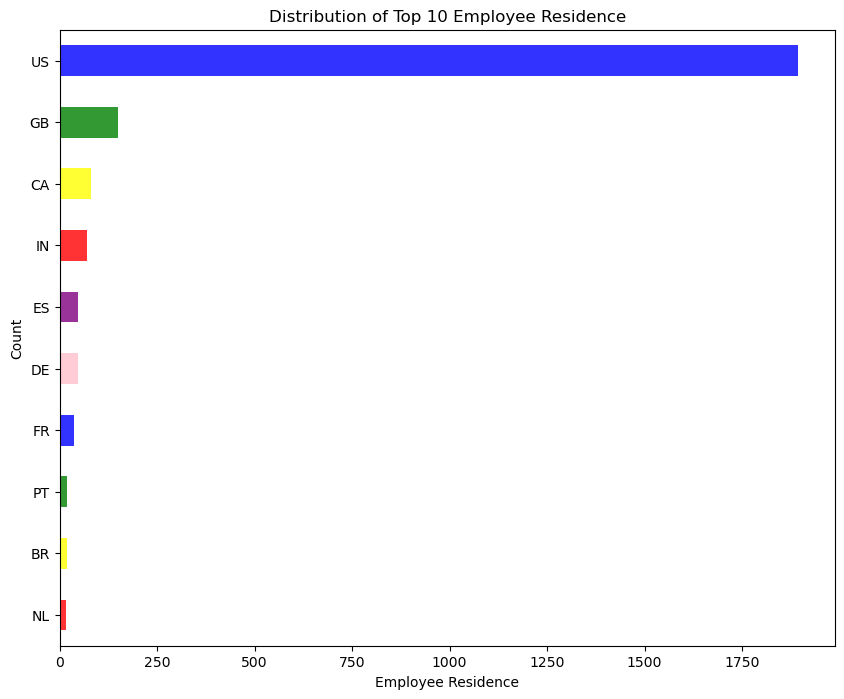

In [17]:
#There are 78 rows unique values for employee residence, so plotting for sample of top 10 employee residence

fig = plt.figure(figsize = (10,8))
color=["blue", "green", "yellow", "red", "purple", "pink"]
Map2 = Top10_Resi.plot(kind="barh", color=color, alpha=0.8).invert_yaxis()
plt.xticks(rotation="horizontal")
plt.title("Distribution of Top 10 Employee Residence")
plt.xlabel("Employee Residence")
plt.ylabel("Count")
plt.savefig("output_data_NT/Fig4_distribution_Top10_Employee_Residence.png")
plt.show()

In [18]:
#Drop US from top11 data set
Top11_Resi1=salary_df["employee_residence"].value_counts().head(11)

Top10_Resi = Top11_Resi1[1:]

print(Top10_Resi)

employee_residence
GB    150
CA     81
IN     70
ES     47
DE     47
FR     37
PT     18
BR     18
NL     15
GR     13
Name: count, dtype: int64


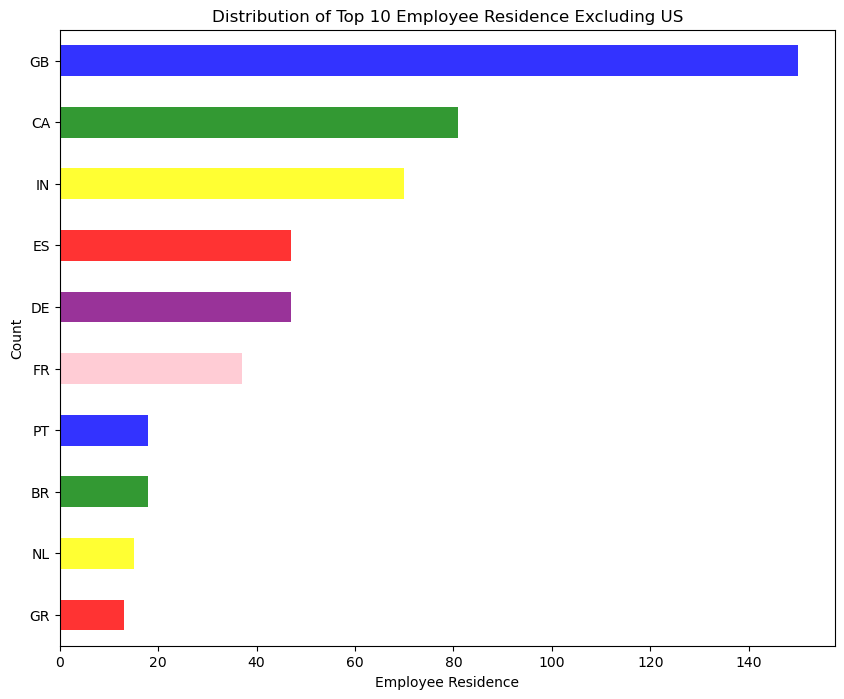

In [19]:
#The graph above shows that majority of employees working in data science related jobs are residence of US.
#To compare the data for other countries US is dropped from the data for comparison purpose.

fig = plt.figure(figsize = (10,8))
color=["blue", "green", "yellow", "red", "purple", "pink"]
Map2 = Top10_Resi.plot(kind="barh", color=color, alpha=0.8).invert_yaxis()
plt.xticks(rotation="horizontal")
plt.title("Distribution of Top 10 Employee Residence Excluding US")
plt.xlabel("Employee Residence")
plt.ylabel("Count")
plt.savefig("output_data_NT/Fig5_distribution_Top10_No_US_Employee_Residence.png")
plt.show()

# Univariant Analysis :

Distibution of Experience Level : The graph shows Senior Level experience has maximum number of entries in the dataset followed by Medium level, Entry level and Executive level.

Distribution of Employee Residence: 73% of total employees in datascience fields are resident of US followed by GB, CA, ES, IN and so on.

In [21]:
#Creating and Replacing Employment Type 
Emp_dict={
    "FT" : "Full Time",
    "PT" : "Part Time",
    "CT" : "Contractual",
    "FL" : "Freelancer"
}
salary_df["employment_type"] = salary_df["employment_type"].replace(Emp_dict)

In [22]:
#Analysis of Salary vs Employment Types
Salary_Avg_Emp= salary_df.groupby("employment_type")["salary_in_usd"].mean()
print(Salary_Avg_Emp)
color=["green", "blue", "yellow", "red"]

employment_type
Contractual    113446.900000
Freelancer      51807.800000
Full Time      134434.613271
Part Time       39533.705882
Name: salary_in_usd, dtype: float64


In [23]:
#Analysis of Salary vs Employment Types
Salary_of_Emp= salary_df.groupby("employment_type")["salary_in_usd"].sum()
print(Salary_of_Emp)

employment_type
Contractual      1134469
Freelancer        518078
Full Time      342404960
Part Time         672073
Name: salary_in_usd, dtype: int64


In [24]:
# Put employment type into a list for for loop (and later for plot labels)
Employment_Type =  ["Full Time", "Contractual", "Freelancer", "Part Time"]

# Create empty list to fill with salary (for plotting)
Salary_Data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for Emp in Employment_Type: 
    
    # Locate the rows which contain employment type and get the employment
    Salary_DF = salary_df.loc[salary_df["employment_type"] == Emp, "salary_in_usd"]
    
    # add subset 
    Salary_Data.append(Salary_DF)
    
    # Determine outliers using upper and lower bounds
    Quartiles =  Salary_DF.quantile([.25, .5, .75])
    LowerQuart = Quartiles[0.25]
    UpperQuart = Quartiles[0.75]
    iqr = UpperQuart-LowerQuart
    
    LowerBound = LowerQuart - (1.5 * iqr)
    UpperBound = UpperQuart + (1.5 * iqr)
    
    Outliers = Salary_DF.loc[(Salary_DF < LowerBound) |  (Salary_DF > UpperBound)]

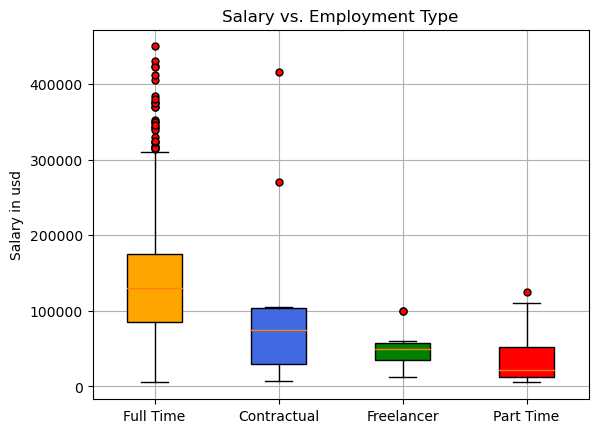

In [25]:
# Generate a box plot that shows the distrubution of salary over employment type.

OutlierPoint = dict(markerfacecolor="red", markersize = 5)
box=plt.boxplot(Salary_Data, labels=Employment_Type, patch_artist=True, flierprops=OutlierPoint)
colors = ['orange', 'royalblue', 'green',  'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    plt.grid(True)
plt.title('Salary vs. Employment Type')
plt.ylabel("Salary in usd")
plt.savefig("output_data_NT/Fig6_salary_Employment_level.png")
plt.show()

In [26]:
# Removing outliers in salary_in_usd for different categories of experience_level: Salary vs. Experience Level 


df_remove_outlier1=salary_df[(salary_df["salary_in_usd"]<310000)&(salary_df["employment_type"]=="Full Time")]
df_remove_outlier2=salary_df[(salary_df["salary_in_usd"]<100000)&(salary_df["employment_type"]=="Contractual")]
df_remove_outlier3=salary_df[(salary_df["salary_in_usd"]<50000)&(salary_df["employment_type"]=="Freelancer")]
df_remove_outlier4=salary_df[(salary_df["salary_in_usd"]<45000)&(salary_df["employment_type"]=="Part Time")]
dataframes = [df_remove_outlier1,df_remove_outlier2, df_remove_outlier3, df_remove_outlier4]
final_df_remove_outlier =pd.concat(dataframes)
final_df_remove_outlier

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior Level,Full Time,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
3,2023,Senior Level,Full Time,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,Senior Level,Full Time,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,Senior Level,Full Time,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,Senior Level,Full Time,Applied Scientist,136000,USD,136000,US,0,US,L
...,...,...,...,...,...,...,...,...,...,...,...
3537,2021,Medium Level,Part Time,3D Computer Vision Researcher,400000,INR,5409,IN,50,IN,M
3576,2020,Entry Level,Part Time,ML Engineer,14000,EUR,15966,DE,100,DE,S
3687,2021,Entry Level,Part Time,Computer Vision Engineer,180000,DKK,28609,DK,50,DK,S
3710,2020,Entry Level,Part Time,Data Scientist,19000,EUR,21669,IT,50,IT,S


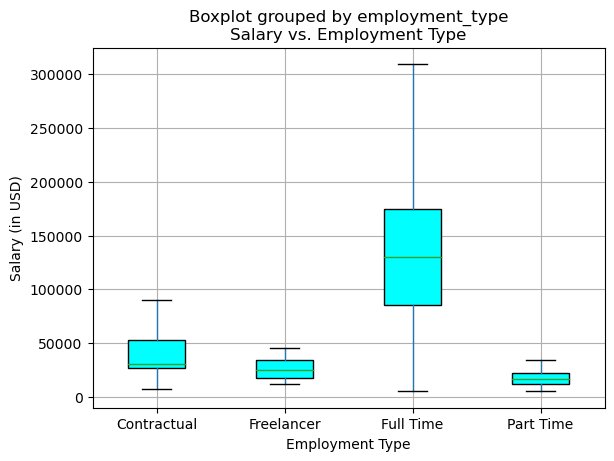

In [27]:
# Plotting Salary vs. Employment Typel (with removed outliers in salary_in_usd)
a="blue"
b="red"
c="cyan"
final_df_remove_outlier.boxplot(column=["salary_in_usd"], by=["employment_type"], patch_artist=True, boxprops=dict(facecolor=c), flierprops=dict(color=a, markeredgecolor=a))

plt.title('Salary vs. Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary (in USD)')
plt.savefig("output_data_NT/Fig7_salary_Employment__RemovedOutlier_level.png")
plt.show()



<Figure size 1000x800 with 0 Axes>

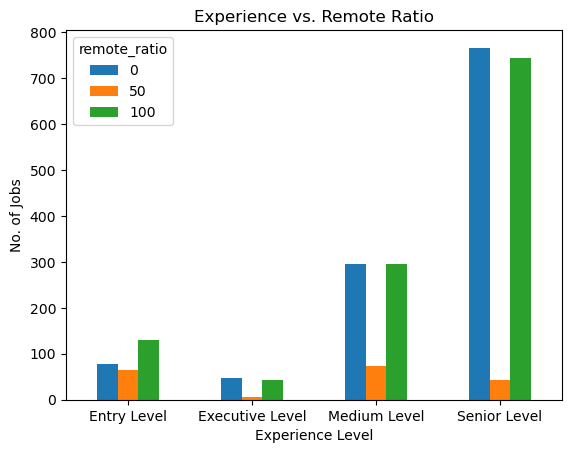

In [28]:
#Analysis of distribution over Experience over Remote Ratio

reduced_dataframe=salary_df.groupby(["experience_level"]).remote_ratio.value_counts().reset_index(name="no_of_jobs")
experience_employment_Df=reduced_dataframe.groupby(["experience_level"])["no_of_jobs"].sum()
making_dataframe=experience_employment_Df.to_frame().reset_index()

final_dataframe_Emp_Exp = reduced_dataframe[reduced_dataframe["experience_level"].isin(making_dataframe["experience_level"])]
fig = plt.figure(figsize = (10,8))
pivot_dataframe_plotting=final_dataframe_Emp_Exp.pivot(index="experience_level", columns ="remote_ratio", values ="no_of_jobs")
pivot_dataframe_plotting.plot(kind="bar")
plt.title("Experience vs. Remote Ratio")
plt.xlabel('Experience Level')
plt.ylabel('No. of Jobs')
plt.xticks(rotation=0)
plt.savefig("output_data_NT/Fig8_Experience-Remote.png")
plt.show()

# Bivariate Analysis 

1.  There's a clear trend that as employment type differes, the median salary also differs. 
2.  The Full Time employees has the highest median salary, followed by Contractual, Freelancer, and Part Time. 
3.  The spread of salaries (as shown by the height of the boxes) also seems to differ with difference in emplyment type.
4.  The data shows that majority of senior level employees irrespective of their experience level preferred to work either 100 % on-site or remote and least preferred hybrid working mode.